<a href="https://colab.research.google.com/github/7692TITO/Credit-Card-Default-Prediction/blob/main/Credit_Card_Default_Prediction1_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Credit Card Default Prediction 
## **Predicting whether a customer will default on his/her credit card**</b>

# <b> Problem Statement </b>



### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients.

###Can we reliably predict who has is likely to default? If so, the bank may be able to prevent the loss by providing the customer with alternative options (such as forbearance or debt consolidation, etc.). I will use various machine learning classification techniques to perform my analysis.


# <b> Data Description </b>



### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

#**Importing Libraries** 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
# Sklearn Libraries
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
#Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Importing the dataset

credit_df = pd.read_csv('/content/drive/MyDrive/Credit Card Fraud Detection/default of credit card clients.csv')

# **Dataset Inspection**

In [7]:
credit_df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [8]:
credit_df.shape

(30001, 25)

In [9]:
credit_df.columns

Index(['Unnamed: 0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       'X20', 'X21', 'X22', 'X23', 'Y'],
      dtype='object')

In [10]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  30001 non-null  object
 1   X1          30001 non-null  object
 2   X2          30001 non-null  object
 3   X3          30001 non-null  object
 4   X4          30001 non-null  object
 5   X5          30001 non-null  object
 6   X6          30001 non-null  object
 7   X7          30001 non-null  object
 8   X8          30001 non-null  object
 9   X9          30001 non-null  object
 10  X10         30001 non-null  object
 11  X11         30001 non-null  object
 12  X12         30001 non-null  object
 13  X13         30001 non-null  object
 14  X14         30001 non-null  object
 15  X15         30001 non-null  object
 16  X16         30001 non-null  object
 17  X17         30001 non-null  object
 18  X18         30001 non-null  object
 19  X19         30001 non-null  object
 20  X20   

###**Renaming the Column name**
1.**Renamed the columns using the first record given in the dataset and dropped the first record.**

2.**Renamed our target variable to defaulter and PAY_0 column to PAY_1**

3.**Converted the datatypes of all columns from object to int datatype because all columns contains numerical values.**

4.**Drop the ID column from the dataset,since its not an influential feature in our modeling**

In [11]:
# Renaming the columns in the dataset
credit_df.rename(columns= credit_df.loc[0,:],inplace=True)

In [12]:
# Dropping the first record after renaming the columns
credit_df= credit_df[1:]

In [13]:
#Renaming the column name PAY_0
credit_df.rename(columns={'PAY_0':'PAY_1','default payment next month':'defaulter'},inplace=True)


In [14]:
# Converting the datatype from object to integer in all the columns
credit_df = credit_df.astype(object).astype(int)

In [15]:
credit_df.drop(labels='ID',inplace=True,axis=1)

In [16]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   SEX        30000 non-null  int64
 2   EDUCATION  30000 non-null  int64
 3   MARRIAGE   30000 non-null  int64
 4   AGE        30000 non-null  int64
 5   PAY_1      30000 non-null  int64
 6   PAY_2      30000 non-null  int64
 7   PAY_3      30000 non-null  int64
 8   PAY_4      30000 non-null  int64
 9   PAY_5      30000 non-null  int64
 10  PAY_6      30000 non-null  int64
 11  BILL_AMT1  30000 non-null  int64
 12  BILL_AMT2  30000 non-null  int64
 13  BILL_AMT3  30000 non-null  int64
 14  BILL_AMT4  30000 non-null  int64
 15  BILL_AMT5  30000 non-null  int64
 16  BILL_AMT6  30000 non-null  int64
 17  PAY_AMT1   30000 non-null  int64
 18  PAY_AMT2   30000 non-null  int64
 19  PAY_AMT3   30000 non-null  int64
 20  PAY_AMT4   30000 non-null  int64
 21  PAY_AMT5   3

In [17]:
credit_df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaulter
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


###**The  Dataset Inspection Summary**
1. **The average credit card limit/consumer credit amount is 167484.32(NT Dollars)**
2. **The maximum number of credit card holders were females in Taiwan.**
3. **The given dataset consist of 30000 rows and 24 columns**
4. **The feature 'defaulter'  is our dependent/target feature**
5. **The most number of credit card holders were having university degree education.**
6. **The most of the customers marriage status was Single, who carries a credit card.** 



#**Thought Process and Methodolgy**




What actually will drive the customer to default the payment?

Do we think of all the given variables when we are trying to find out a defaulter? 
e.g. When we think about the defaulter, do we care about its 'Male or Female'.Do gender has any infulence on our target variable?.

If so, how important would this variable be? 
e.g. What is the impact of having that SEX variable? Whether the variable has a postive or negative correlation with our target variable defaulter.

Is this information already described in any other variable? 

These are few questions you ask before predicting whether the customer will be defaulter or not -

What is the customer past payment history?

What is his credit limit and whether he is paying the bills in a timely manner?

What is his/her age and educational background?

... Lot more..

**The steps followed in this Classification Project were as follows--**


Data Cleaning

Feature Engineering

Exploratory Data Analysis

Handling Class Imbalance

Buliding  Model using different Algorithms 

Evaluation Metrics

Feature Importance/Selection

Hyperparameter Tuning

Analyze Results

#**Data Cleaning**

In [18]:
#check for null values
credit_df.isnull().sum()

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
defaulter    0
dtype: int64

In [19]:
#check for duplicate rows
credit_df.duplicated().sum()

35

In [20]:
#dropping duplicate rows
credit_df = credit_df.drop_duplicates()

In [21]:
credit_df.duplicated().sum()

0

In [22]:
#Check for imbalance data in Target Feature
(credit_df['defaulter'].value_counts()/len(credit_df['defaulter'])*100)

0    77.874187
1    22.125813
Name: defaulter, dtype: float64

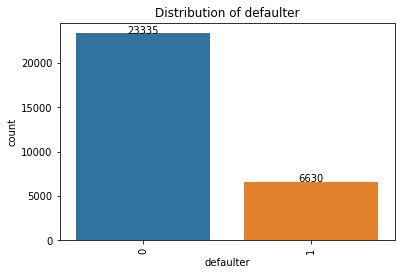

In [23]:
ax = sns.countplot(x=credit_df['defaulter']);
plt.title('Distribution of defaulter')
for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
    y = height+0.2, ha = 'center',s = '{:.0f}'.format(height)) # data label, formatted to ignore decimals
    #ha = ‘center’) # sets horizontal alignment (ha) to center
plt.xticks(rotation = 'vertical')    
plt.show()

###Distribution of target classes is highly imbalanced, non-defaults far outnumber defaults. This is common in these datasets since most people pay credit cards on time

###**Data Cleaning Summary**
1. **Tha given dataset does not contain any missing values**
2. **The given dataset had 35 duplicate rows and we have dropped the duplicate records.**
3. **The target variable consist of imbalance data with 77.87% Non defaulters(0 value) and 22.12% 1 defaulters (1 value).**



#**Feature Engineering**

1.**Replaced 0 class/category in marriage column into class/category 3='others' because 0 class is not defined in the marriage variable.**

2.**Similarly, we replaced few undefined classes like 0, 5 and 6 in education column into class 4='others' using a fuction name education.** 

3.**Replaced negative values in payment history columns i.e (PAY_1,PAY_2...PAY_6)
into class 0 -pay duly on time.** 

4.**Two new Features were derived from the exisiting independent features,because it will help to train our model more effectively**

###**Replacing few classes in MARRIAGE and EDUCATION variables**

In [24]:
credit_df['MARRIAGE'].unique()

array([1, 2, 3, 0])

In [25]:
credit_df['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6, 0])

In [26]:
credit_df['MARRIAGE'].replace(to_replace=0,value=3,inplace=True)

In [27]:
def education(value):
  if value> 4:
    value = 4
  elif value==0:
    value= 4
  else:
    value
  return value


In [28]:
credit_df['EDUCATION']= credit_df['EDUCATION'].apply(education)

In [29]:
credit_df['MARRIAGE'].value_counts()

2    15945
1    13643
3      377
Name: MARRIAGE, dtype: int64

In [30]:
credit_df['EDUCATION'].value_counts()

2    14019
1    10563
3     4915
4      468
Name: EDUCATION, dtype: int64

###**Replaced negative values in payment history columns**

In [31]:
payment_list = ['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']

In [32]:
for var in payment_list:
  credit_df.loc[(credit_df[var] == -1) | (credit_df[var]==-2),var]=0

In [33]:
credit_df.PAY_1.value_counts()

0    23169
1     3667
2     2666
3      322
4       76
5       26
8       19
6       11
7        9
Name: PAY_1, dtype: int64

###**New Features were derived from the exisiting features**

In [34]:
credit_df['Total_Bill_AMT']=credit_df['BILL_AMT1']	+ credit_df['BILL_AMT2']+ credit_df['BILL_AMT3']	+ credit_df['BILL_AMT4']	+ credit_df['BILL_AMT5']	+ credit_df['BILL_AMT6']

In [35]:
credit_df['Total_Paid_AMT']= credit_df['PAY_AMT1']	+ credit_df['PAY_AMT2']+ credit_df['PAY_AMT3']	+ credit_df['PAY_AMT4']	+ credit_df['PAY_AMT5']	+ credit_df['PAY_AMT6']

In [36]:
credit_df['Pending_Payment_AMT']= credit_df['Total_Bill_AMT']- credit_df['Total_Paid_AMT']

In [37]:
credit_df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'defaulter',
       'Total_Bill_AMT', 'Total_Paid_AMT', 'Pending_Payment_AMT'],
      dtype='object')

#**Exploratory Data Analysis and Visualization**

##**UNIVARIATE ANALYSIS**

##MARRIAGE

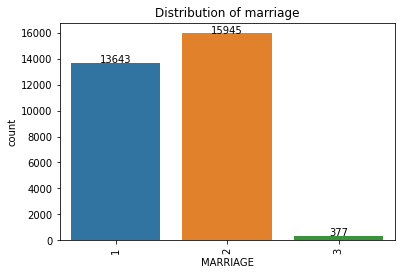

In [38]:
ax = sns.countplot(x=credit_df['MARRIAGE']);
plt.title('Distribution of marriage')
for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
    y = height+0.2, ha = 'center',s = '{:.0f}'.format(height)) # data label, formatted to ignore decimals
    #ha = ‘center’) # sets horizontal alignment (ha) to center
plt.xticks(rotation = 'vertical')    
plt.show()

**From the above graph,we can conclude that the most number of credit card holders were not married(Single)**

##EDUCATION

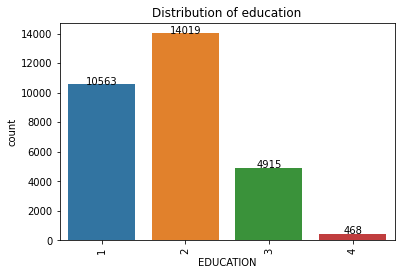

In [39]:
ax = sns.countplot(x=credit_df['EDUCATION']);
plt.title('Distribution of education')
for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
    y = height+0.2, ha = 'center',s = '{:.0f}'.format(height)) # data label, formatted to ignore decimals
    #ha = ‘center’) # sets horizontal alignment (ha) to center
plt.xticks(rotation = 'vertical')    
plt.show()

**The above graph conveys us that the most number of customers were holding  a university degree as their educational qualification followed by graduates degree holders**

##SEX

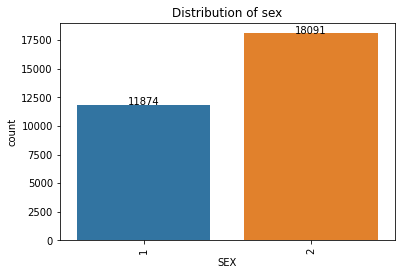

In [40]:
ax = sns.countplot(x=credit_df['SEX']);
plt.title('Distribution of sex')
for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
    y = height+0.2, ha = 'center',s = '{:.0f}'.format(height)) # data label, formatted to ignore decimals
    #ha = ‘center’) # sets horizontal alignment (ha) to center
plt.xticks(rotation = 'vertical')    
plt.show()

**The above figure tells us that the most number of credit card holders in Taiwan were females.** 

**Hence proved the famous saying,the females usually do more shopping compared to mens  from the above given data** 

##AGE

Text(0.5, 1.0, 'Distribution of Age')

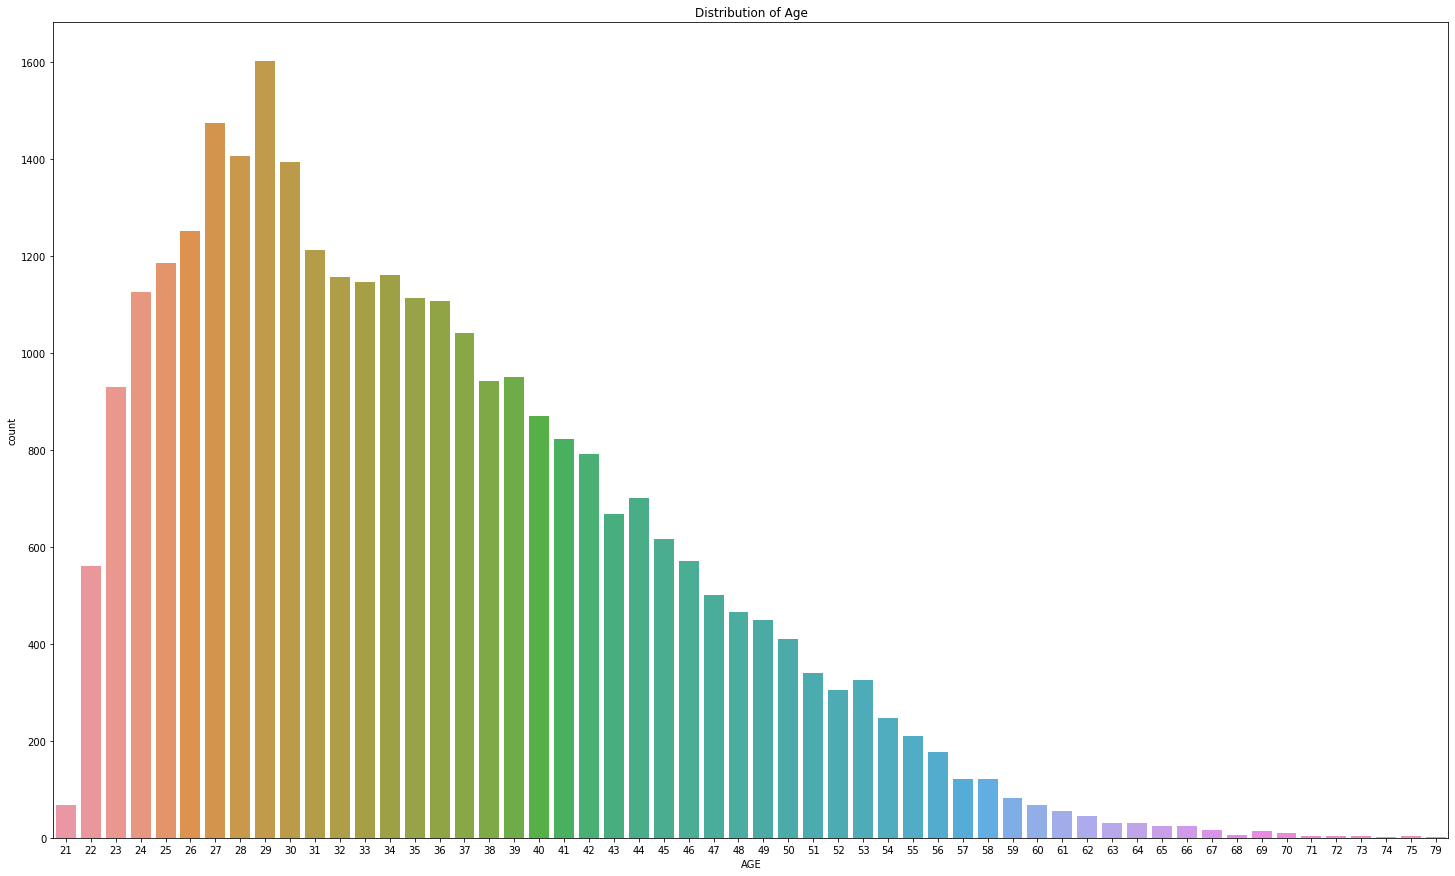

In [41]:
figure, ax = plt.subplots(nrows = 1, ncols=1, figsize = (25,15))
sns.countplot(x = 'AGE', data = credit_df)
plt.title('Distribution of Age')


**The above figure shows the coutplot of Age column** 

The most frequent age  of  the credit card holder is between 25-34.

The highest proportion of credit card holders were youth in the age of 29. 

Hence we can understand that mostly credit cards were popular among youths of taiwan than the older people.

##Repayment Status (Payment History)

In [42]:
def PayColumnsNames(prefix):
    return [prefix+str(x) for x in range(1,7)]

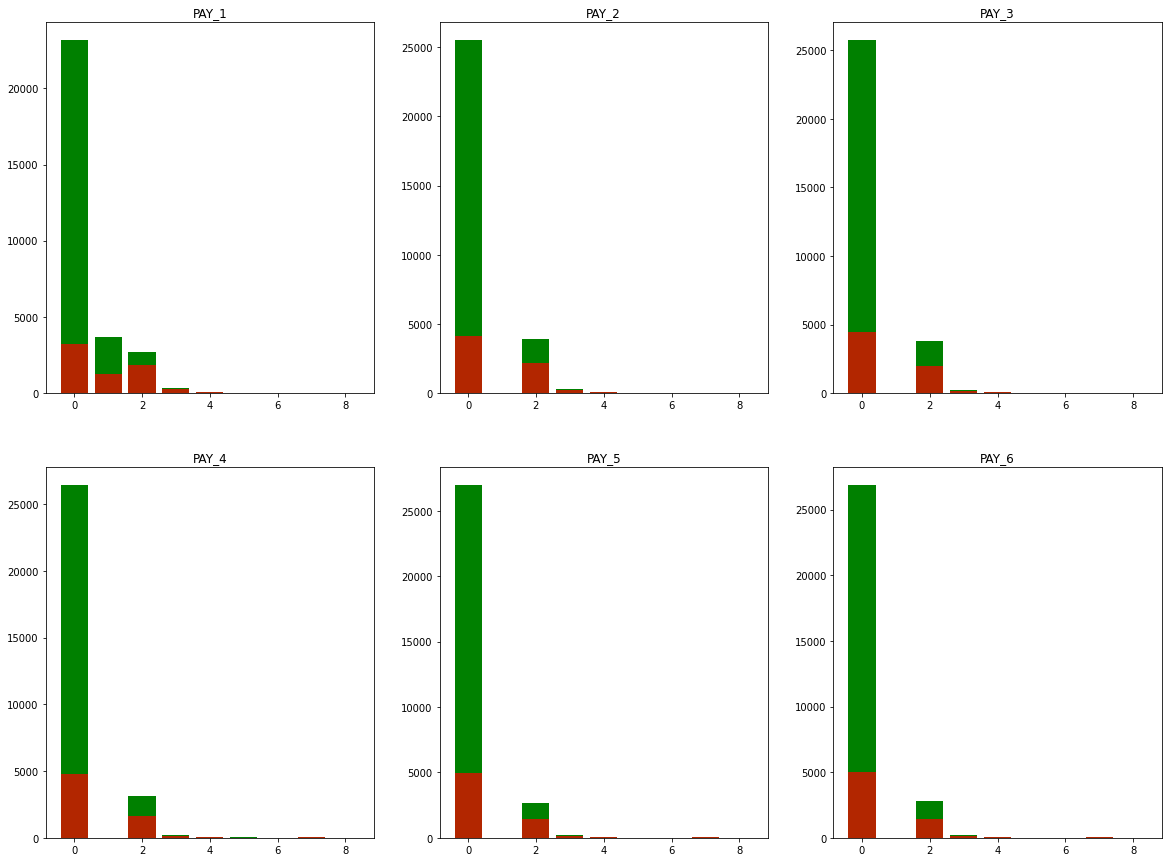

In [43]:
# PAY_1 , PAY_2 , PAY_3 , PAY_4 , PAY_5, PAY_6
pay_columns = PayColumnsNames('PAY_')
figure, ax = plt.subplots(2,3)
figure.set_size_inches(20,15)


for i in range(len(pay_columns)):
    row,col = int(i/3), i%3

    x  = credit_df[pay_columns[i]].value_counts()
    y = credit_df[pay_columns[i]][(credit_df['defaulter']==1)].value_counts()
    ax[row,col].bar(x.index, x, align='center', color='green')
    ax[row,col].bar(y.index, y, align='center', color='red', alpha=0.7)
    ax[row,col].set_title(pay_columns[i])
   


    
plt.show()

**The above figure shows the bar plot of payment history status for past six  months starting from September to April , which show the count of defaulters and non-defaulter**

The payment history status consist of unique values like 
0- No delay in  payment
2- payment delay of 2 months
4 - payment delay of 4 months
6- payment delay of 6 months
8- payment delay of 8 months

The green bins shows the count of payment status of all the customers (both defaulters and non-defaulters). On the otherhand, the red bins shows the count of payment status explicitly for the customers who were  defaulters.

From the above graph, we can conclude that if the payment status is greater than 2 months,then there is a 90% chance of the customer to default the payment.



##Previous Amount Paid (PAY_AMT)

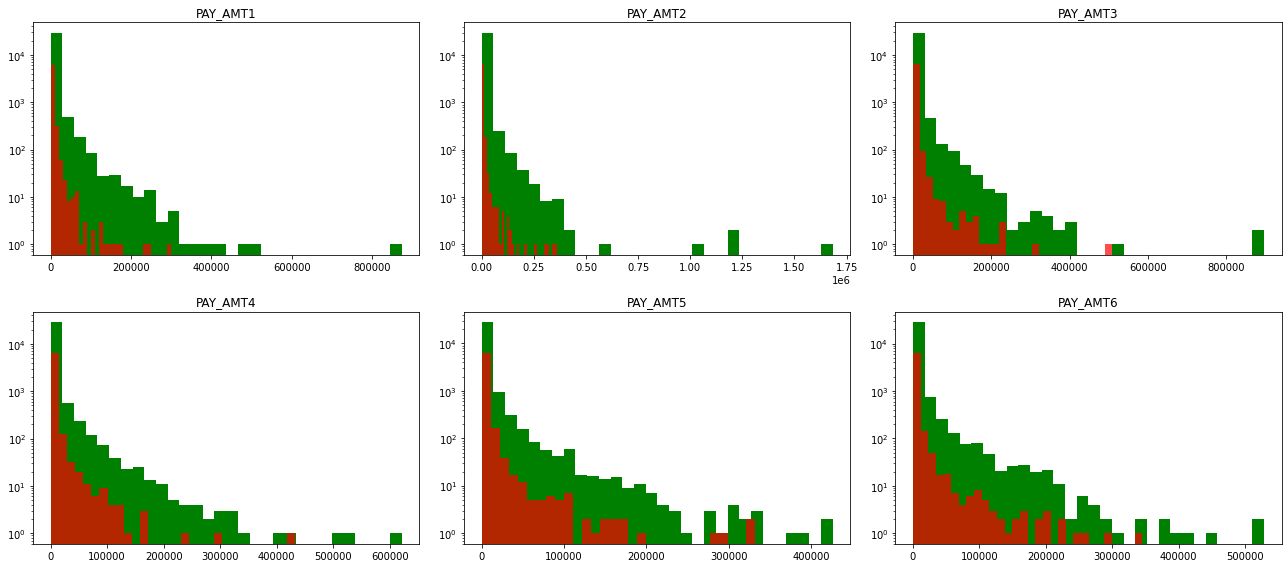

In [44]:
pay_amt_columns = PayColumnsNames('PAY_AMT')
figure, ax = plt.subplots(2,3)
figure.set_size_inches(18,8)


for i in range(len(pay_columns)):
    row,col = int(i/3), i%3

    ax[row,col].hist(credit_df[pay_amt_columns[i]], 30, color ='green')
    ax[row,col].hist(credit_df[pay_amt_columns[i]][(credit_df['defaulter']==1)],30,color='red',alpha = 0.7)
    ax[row,col].set_title(pay_amt_columns[i])
    #adding scaling to make the graph more helpful
    ax[row,col].set_yscale('log', nonposy='clip')


    
plt.tight_layout()
plt.show()

**The above histogram shows the distribution of payment amount for each month explicitly for defaulters after scaling the data using log transform** 

The green bins in the histograms shows the payment_amount for all the customers from September to April Month.

The red bins in the histogram tells the payment amount of customers who were actually a defaulter from September to April Month.

We can tell from the above histogram that the payment amount of defaulters were relatively very low compared to non defaulters and the defaulters payment amount
was falling down as we from April(PAY_AMT6) to September(PAY_AMT1).

We can conclude from the above plot that PAY_AMT1 variable is a key variable which finally helps us to understand the payment behaviour and gives us insight whether the customer will be defaulter or not.

##Bill Amount

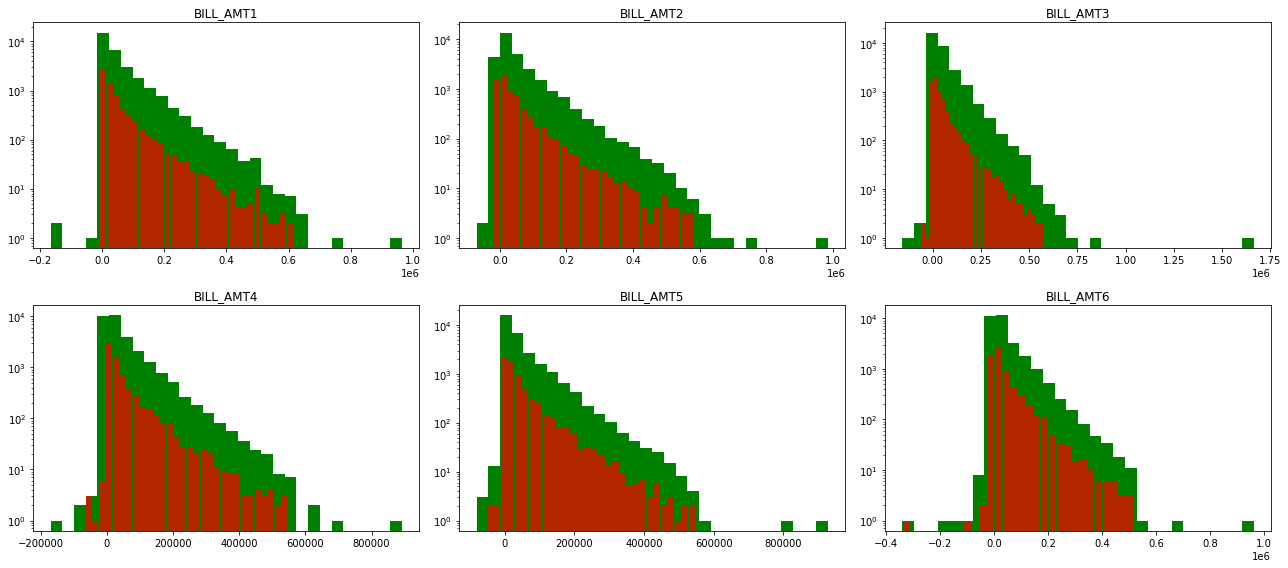

In [45]:
bill_amt_columns = PayColumnsNames('BILL_AMT')
figure, ax = plt.subplots(2,3)
figure.set_size_inches(18,8)


for i in range(len(pay_columns)):
    row,col = int(i/3), i%3

    ax[row,col].hist(credit_df[bill_amt_columns[i]], 30, color ='green')
    ax[row,col].hist(credit_df[bill_amt_columns[i]][(credit_df['defaulter']==1)],30,rwidth=0.9,color='red',alpha = 0.7)
    ax[row,col].set_title(bill_amt_columns[i])
    #adding scaling to make the graph more helpful
    ax[row,col].set_yscale('log', nonposy='clip')


    
plt.tight_layout()
plt.show()

**The above histogram shows the distribution of Bill amount generated for each month explicitly for defaulters**

The green bins in the histograms shows the bill_amount for all the customers from September to April Month.

The red bins in the histogram tells the payment amount of customers who were actually a defaulter from September to April Month.

Above plot indicates that there is higher proportion of clients for whom the bill amount is high but payment done against the same is very low. 

From the above plot , we can say that bill amount variable based on different months from April to September not able to give us a clear insight from the plot whether the customer will be defaulter or not compared to payment amount variable.

Hence payment amount features are more significant variables compared to the bill amount features.

##**BI-VARIATE ANALYSIS**

##Defaulter vs Sex

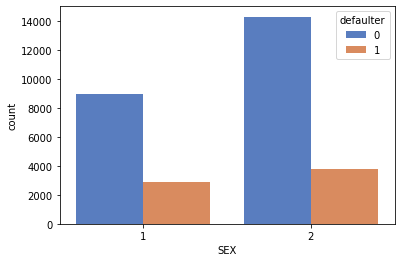

In [46]:
# Checking the number of counts of defaulters and non defaulters sex-wise


sns.countplot(x='SEX', data=credit_df,hue="defaulter", palette="muted")  

In [47]:
credit_df.loc[credit_df['SEX']==2,'defaulter'].value_counts()

0    14330
1     3761
Name: defaulter, dtype: int64

**It is evident from the above count plot output that males have overall less default payment rate w.r.t females**

**Both in Defaulter and Non-Defaults count, females were having higher proportion  (Sex=2)**

##Defaulter vs Education

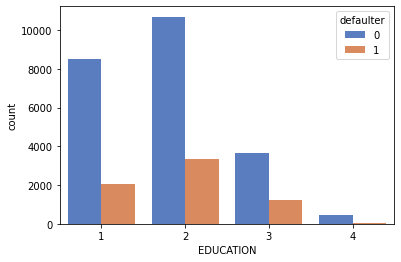

In [48]:
# Checking the number of counts of defaulters and non defaulters education-wise


sns.countplot(x='EDUCATION', data=credit_df,hue="defaulter", palette="muted")  

In [49]:
credit_df.loc[credit_df['EDUCATION']==2,'defaulter'].value_counts()

0    10691
1     3328
Name: defaulter, dtype: int64

**The credit card holders with a university degree were the customers with the highest number of default payment rate compared to other degree holders.**

##Defaulter vs Marriage

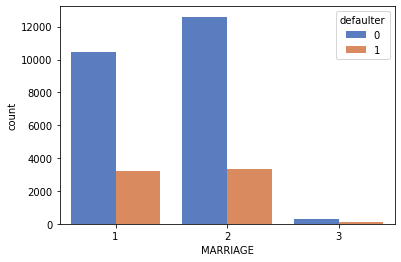

In [50]:
# Checking the number of counts of defaulters and non defaulters marriage-wise


sns.countplot(x='MARRIAGE', data=credit_df,hue="defaulter", palette="muted") 

In [51]:
credit_df.loc[credit_df['MARRIAGE']==2,'defaulter'].value_counts()

0    12605
1     3340
Name: defaulter, dtype: int64

**It is evident from the above plot that both the credit card holders who were singles and married used to do default in payments.**

##Defaulter vs AGE

Text(0.5, 1.0, 'Distribution of Age')

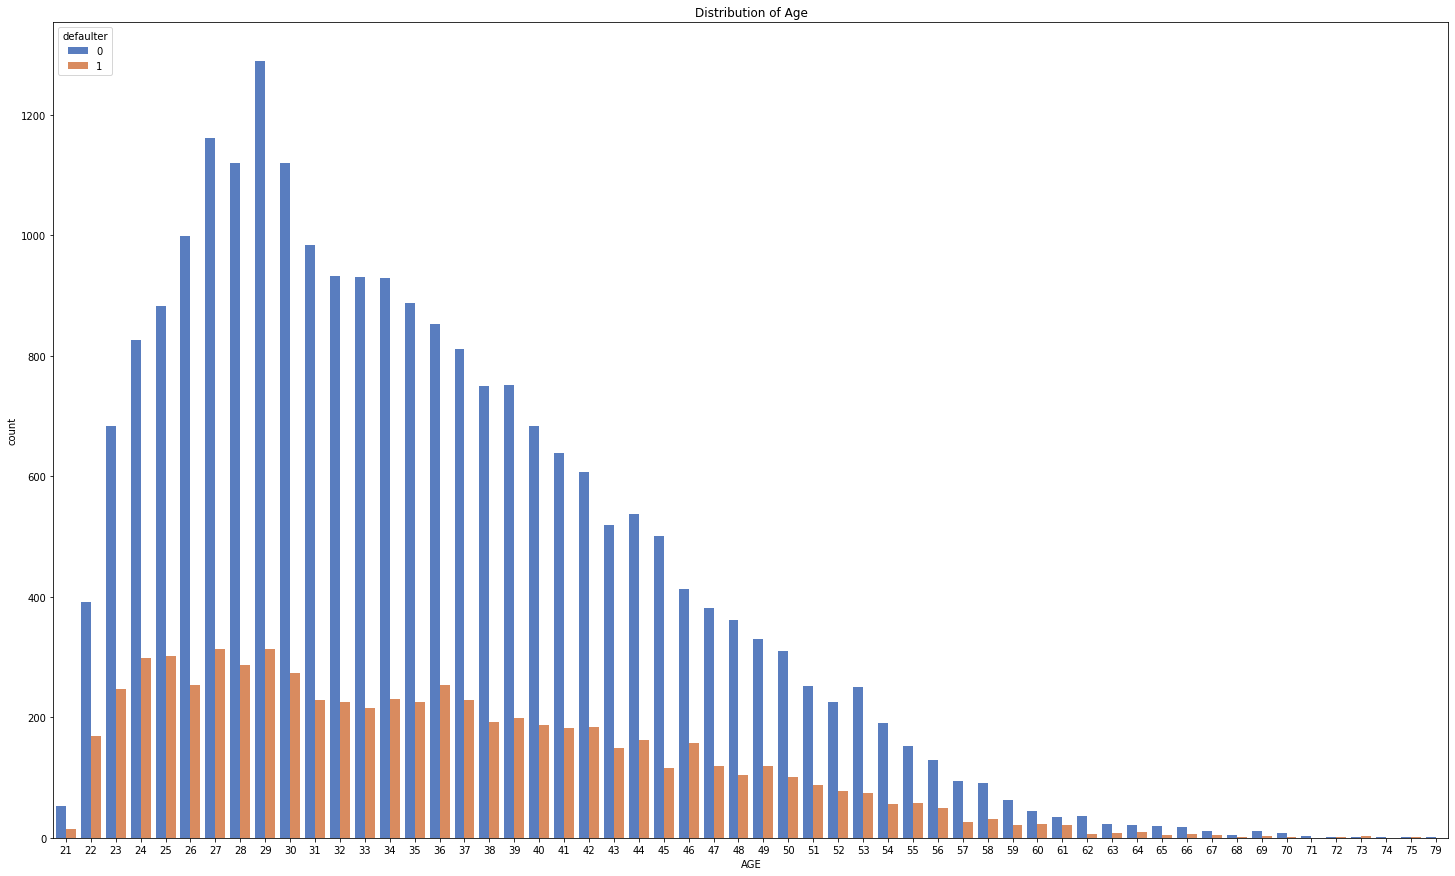

In [52]:
figure, ax = plt.subplots( figsize = (25,15))
sns.countplot(x='AGE', data=credit_df,hue="defaulter", palette="muted") 
plt.title('Distribution of Age')

##**Multi-variate Analysis**

##SEX VS CREDIT LIMIT VS EDUCATION

Text(0.5, 1.0, 'Multivariate Analysis(Sex/Limit_Bal/Education')

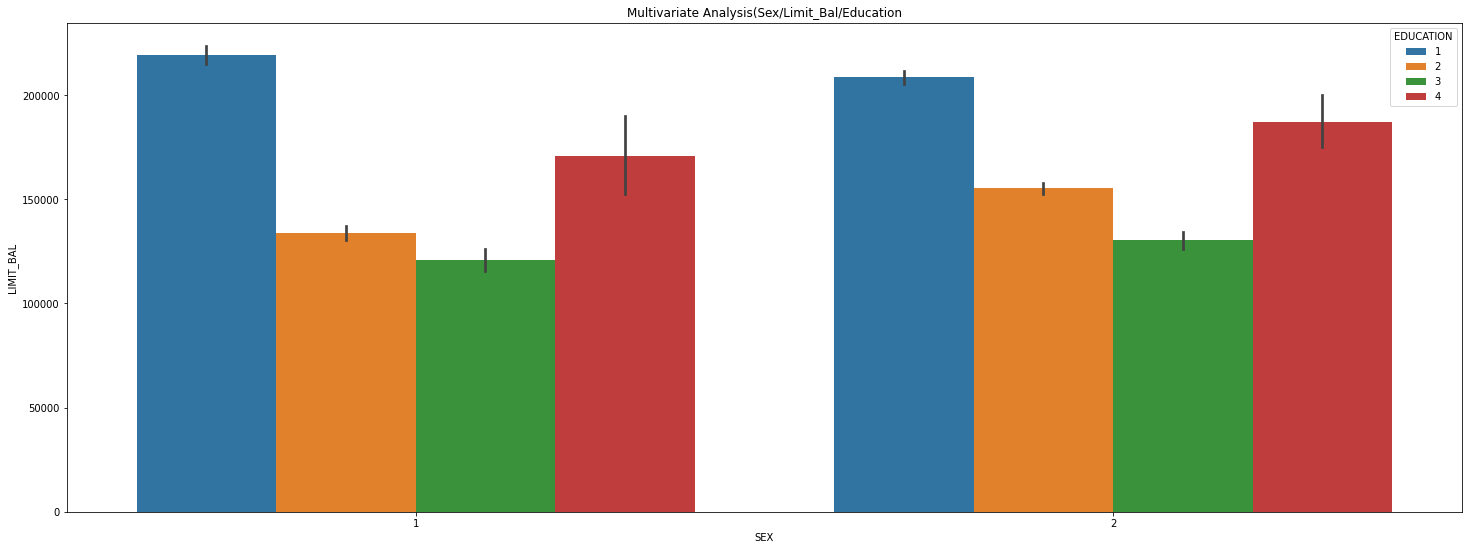

In [53]:
plt.figure(figsize=(25,9))
sns.barplot(x='SEX',y='LIMIT_BAL',data=credit_df,hue='EDUCATION')
plt.title('Multivariate Analysis(Sex/Limit_Bal/Education')

**The above figure tells us that  the highest LIMIT_BAL/credit limit amount is given to the graduate education credit card holders in both the sex.**

**On the contrary, the least credit limit amount is given to the high school education credit card holders in both the sex.**


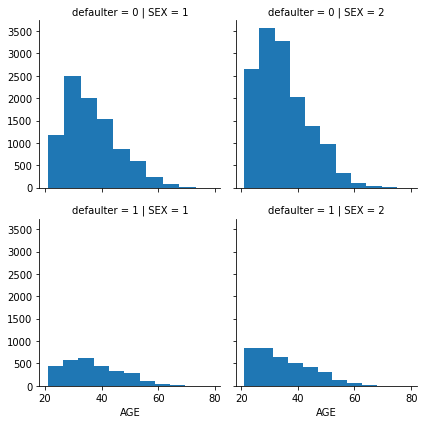

In [54]:
g = sns.FacetGrid(credit_df, row='defaulter', col='SEX')
g = g.map(plt.hist, 'AGE')

It can be seen that females of age group 20-30 have very high tendency to default payment compared to males in all age brackets. Hence we can keep the SEX column of clients to predict probability of defaulting payment.


In [55]:
# plot columns with similar names using pairplot

#sns.pairplot(credit_df, vars=credit_df.columns[11:17], kind='scatter',hue= 'defaulter')
#sns.pairplot(credit_df, vars=credit_df.columns[17:23],hue = 'defaulter')

# **Heat Map** (check for most correlated features)

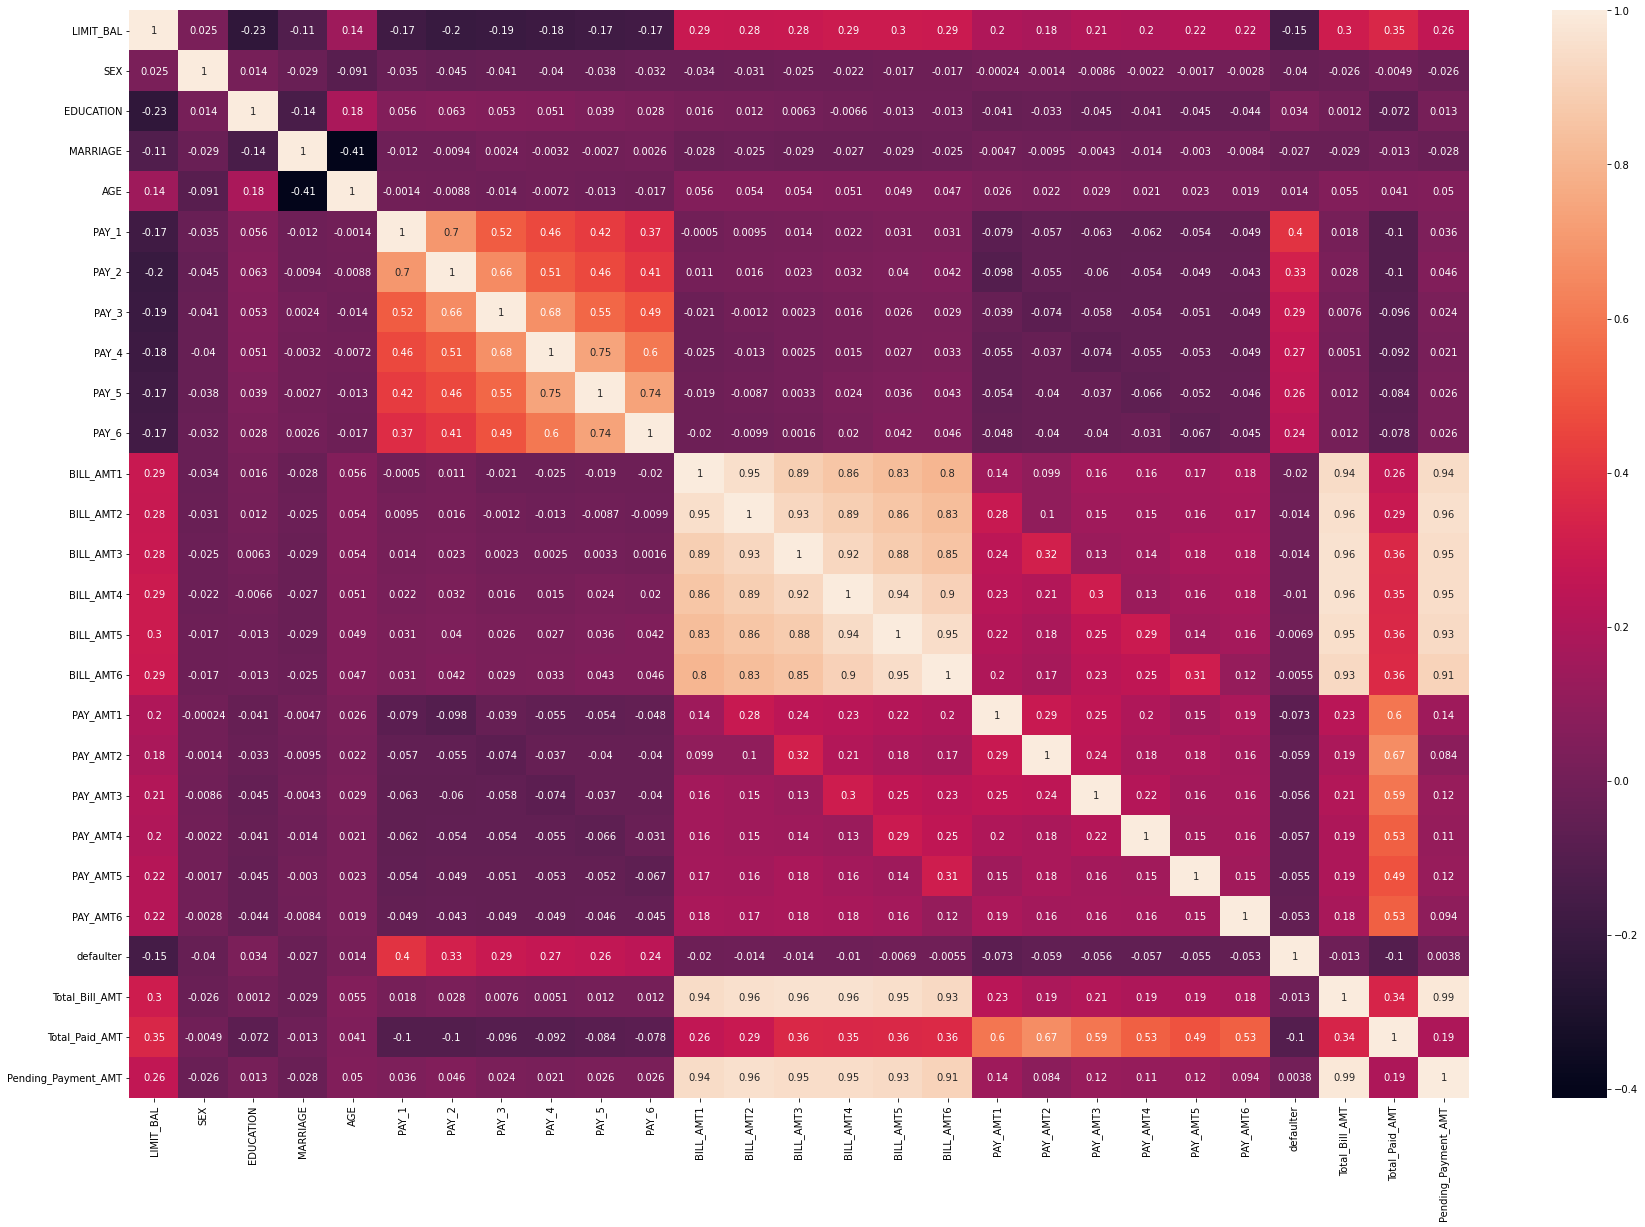

In [56]:
plt.subplots(figsize=(30,20))
sns.heatmap(credit_df.corr(), annot=True)
plt.show()

## The above heatmap clearly tells you that the PAY_1 to PAY_6 variables are the strongest predictors of defaulter which are postively correlated with the target variable.

## Hence we can conclude from the above heatmap that the most important feature infulencing our target feature will be Pay_1 to Pay_6. But there is multicollinearity between the Payment Repayment Status features.

## The LIMIT_BAL and PAY_AMT_1 to PAY_AMT_6 variables showing a negative correlation with the target variable defaulter

## Apart from that,we can find a positive correlation among the features LIMIT_BAL and BILL_AMT

## A negative correlation between AGE and MARRIAGE

## We will first train model wil all the features and try reducing the non-important features.

#**Outliers**

In [57]:
# find Numerical variables
numerical = [var for var in credit_df.columns if credit_df[var].dtype !='O']
print('There are {} numerical variables'.format(len(numerical)))

There are 27 numerical variables


In [58]:
discrete = []
for var in numerical:
    if len(credit_df[var].unique())<20:
        print(var, ' values: ', credit_df[var].unique())
        discrete.append(var)
        
print('There are {} discrete variables'.format(len(discrete)))

SEX  values:  [2 1]
EDUCATION  values:  [2 1 3 4]
MARRIAGE  values:  [1 2 3]
PAY_1  values:  [2 0 1 3 4 8 7 5 6]
PAY_2  values:  [2 0 3 5 7 4 1 6 8]
PAY_3  values:  [0 2 3 4 6 7 1 5 8]
PAY_4  values:  [0 2 3 4 5 7 6 1 8]
PAY_5  values:  [0 2 3 5 4 7 8 6]
PAY_6  values:  [0 2 3 6 4 7 8 5]
defaulter  values:  [1 0]
There are 10 discrete variables


In [59]:
# outliers in discrete variables
for var in discrete:
    print(credit_df[var].value_counts() / np.float(len(credit_df)))
    print()

2    0.603738
1    0.396262
Name: SEX, dtype: float64

2    0.467846
1    0.352511
3    0.164025
4    0.015618
Name: EDUCATION, dtype: float64

2    0.532121
1    0.455298
3    0.012581
Name: MARRIAGE, dtype: float64

0    0.773202
1    0.122376
2    0.088970
3    0.010746
4    0.002536
5    0.000868
8    0.000634
6    0.000367
7    0.000300
Name: PAY_1, dtype: float64

0    0.851927
2    0.131020
3    0.010879
4    0.003304
1    0.000934
5    0.000834
7    0.000667
6    0.000400
8    0.000033
Name: PAY_2, dtype: float64

0    0.859436
2    0.127449
3    0.008009
4    0.002503
7    0.000901
6    0.000768
5    0.000701
1    0.000133
8    0.000100
Name: PAY_3, dtype: float64

0    0.882897
2    0.105423
3    0.006007
4    0.002269
7    0.001936
5    0.001168
6    0.000167
1    0.000067
8    0.000067
Name: PAY_4, dtype: float64

0    0.900984
2    0.087636
3    0.005940
4    0.002770
7    0.001936
5    0.000567
6    0.000133
8    0.000033
Name: PAY_5, dtype: float64

0    0.897280
2    0.

**Plotting outliers in discrete variables**

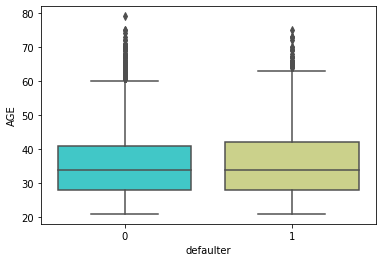

In [60]:
sns.boxplot(x='defaulter',y='AGE',data=credit_df,palette='rainbow')

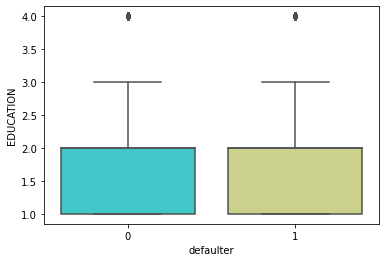

In [61]:
sns.boxplot(x='defaulter',y='EDUCATION',data=credit_df,palette='rainbow')

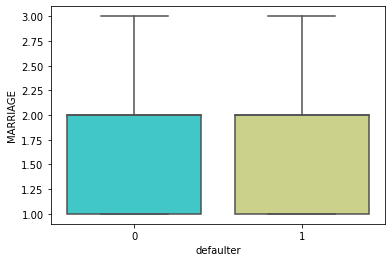

In [62]:
sns.boxplot(x='defaulter',y='MARRIAGE',data=credit_df,palette='rainbow')

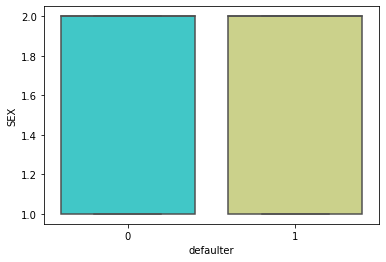

In [63]:
sns.boxplot(x='defaulter',y='SEX',data=credit_df,palette='rainbow')

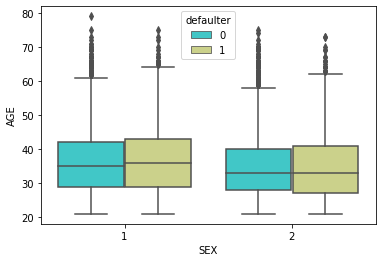

In [64]:
sns.boxplot(x='SEX',hue='defaulter', y='AGE',data=credit_df,palette="rainbow")

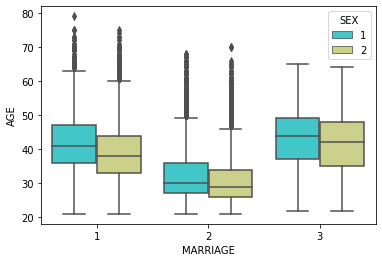

In [65]:
sns.boxplot(x='MARRIAGE',hue='SEX', y='AGE',data=credit_df,palette="rainbow" )

Marriage, age, and sex. The dataset mostly contains couples in their mid-30s to mid-40s and single people in their mid-20s to early-30s.

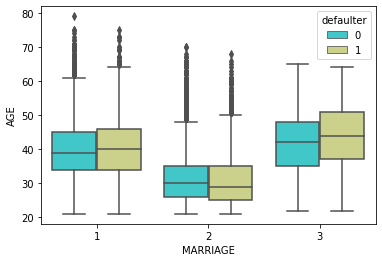

In [66]:
sns.boxplot(x='MARRIAGE',hue='defaulter', y='AGE',data=credit_df,palette="rainbow")

**Plotting outliers in continuous variables**

In [67]:
continuous = [var for var in numerical if var not in discrete ]

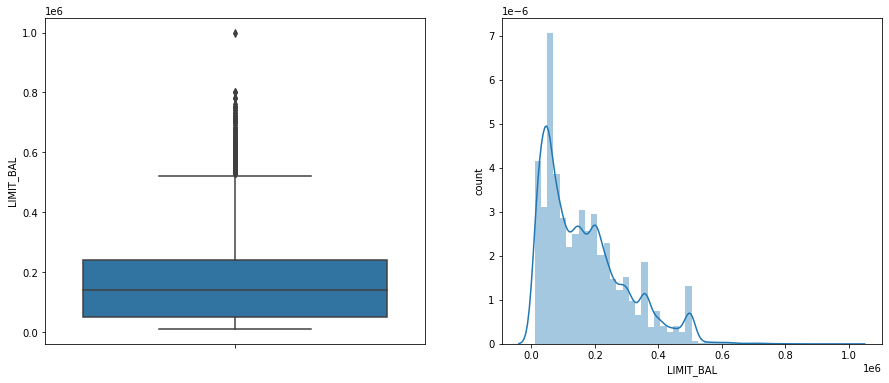

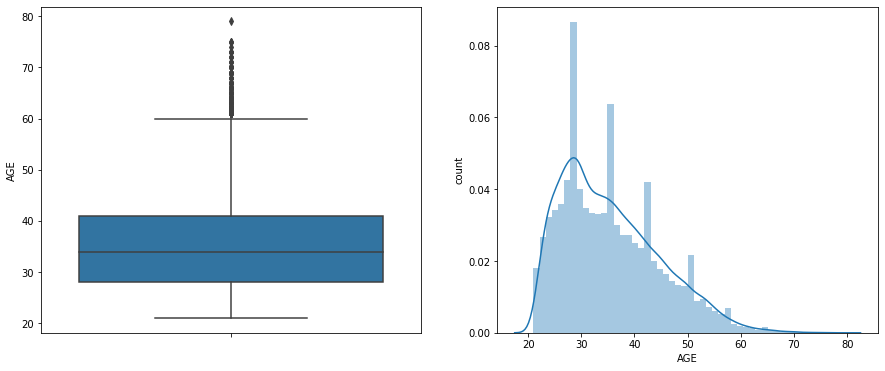

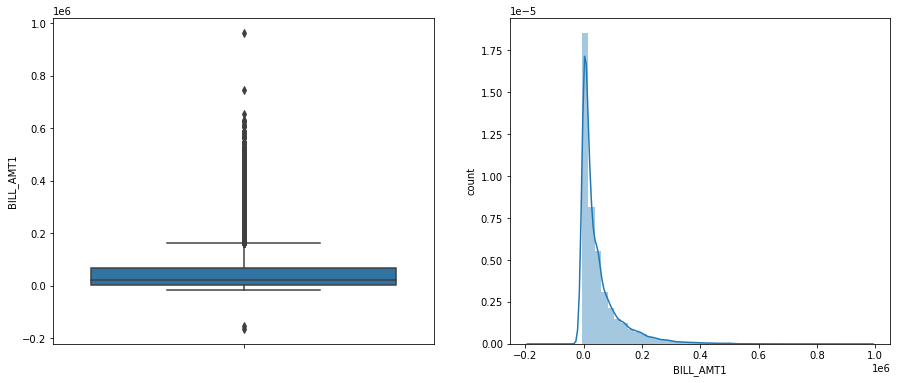

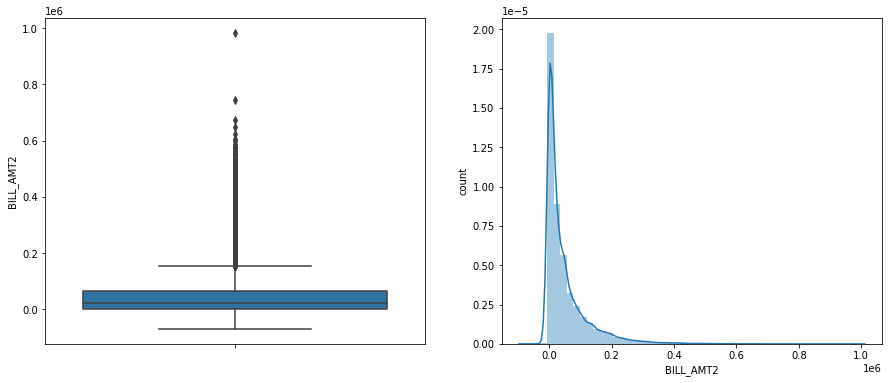

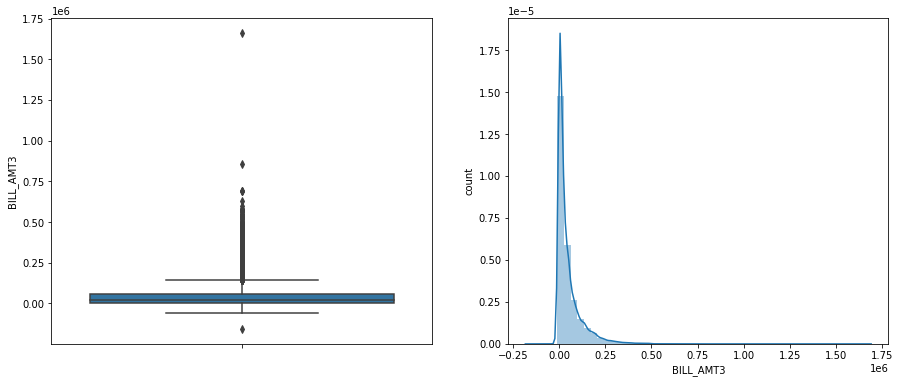

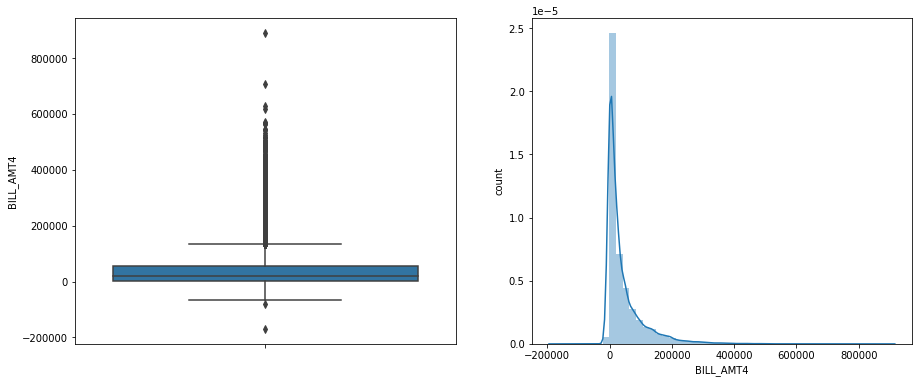

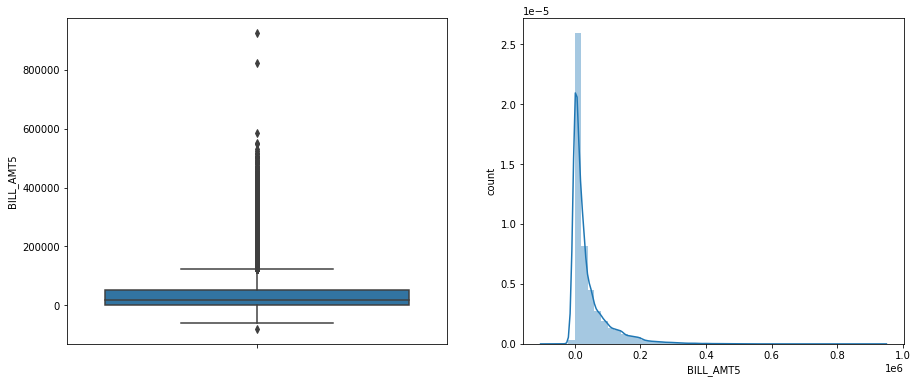

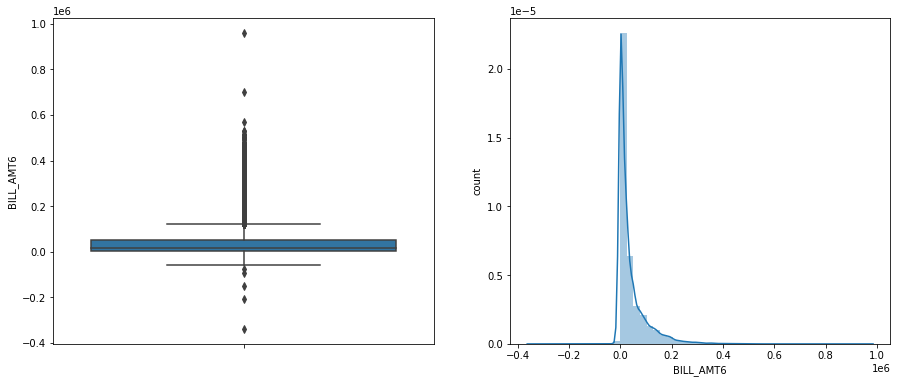

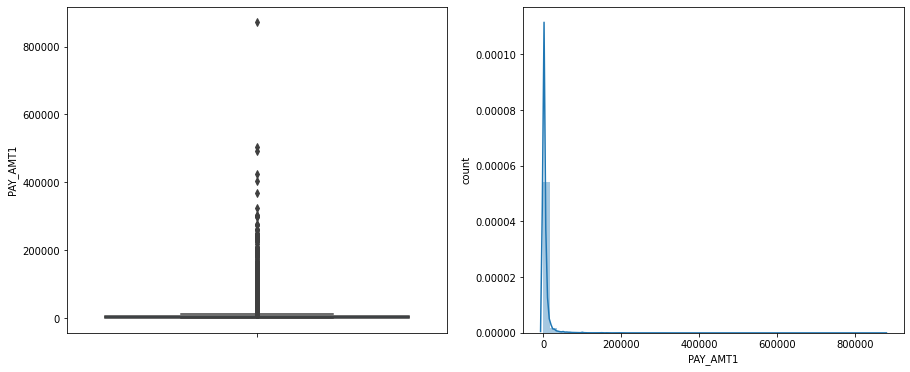

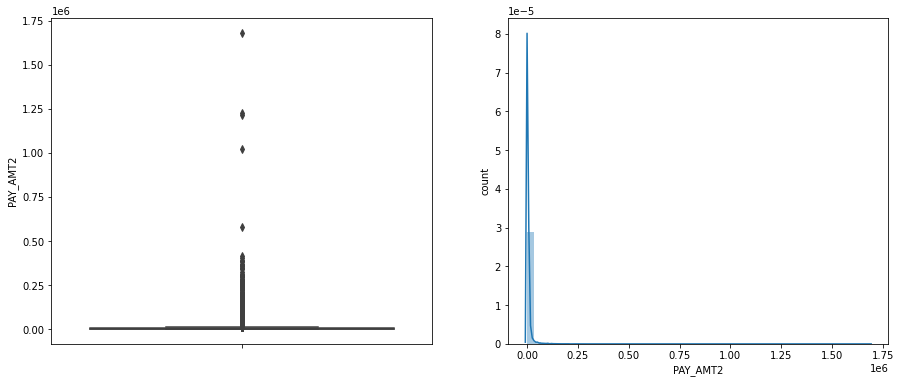

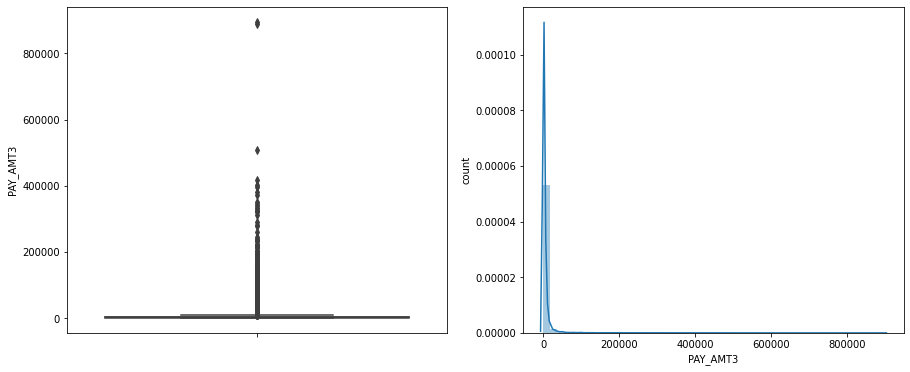

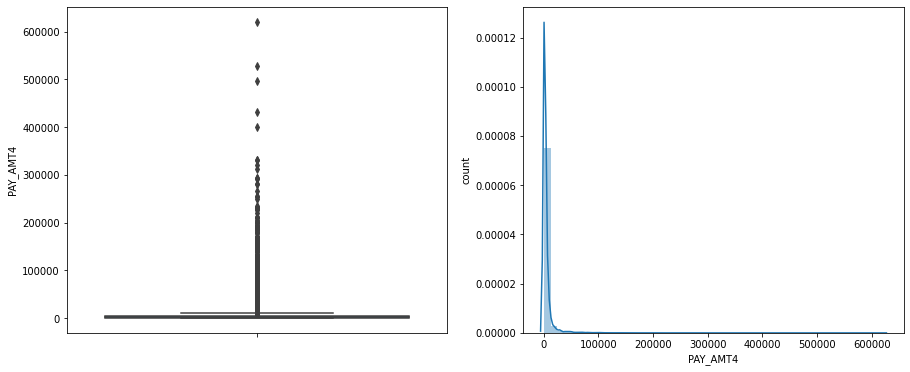

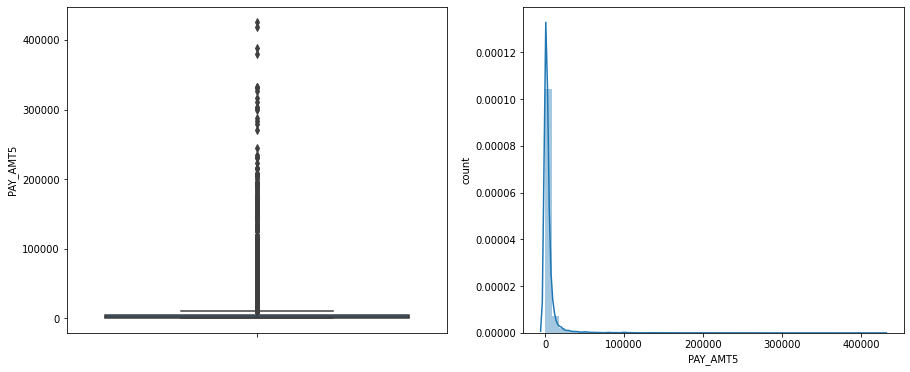

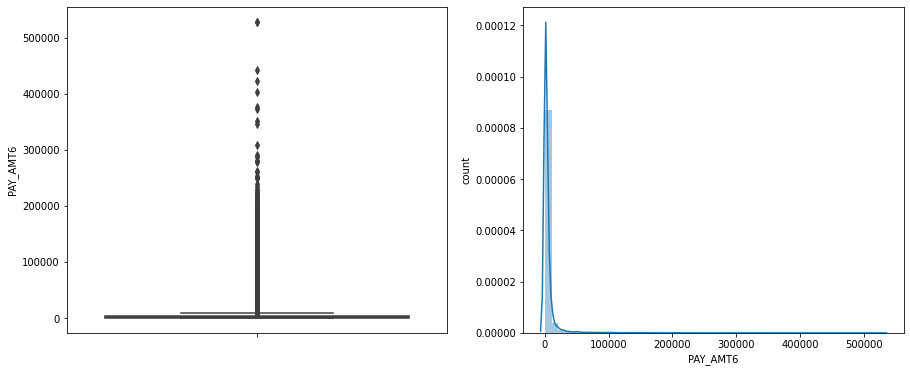

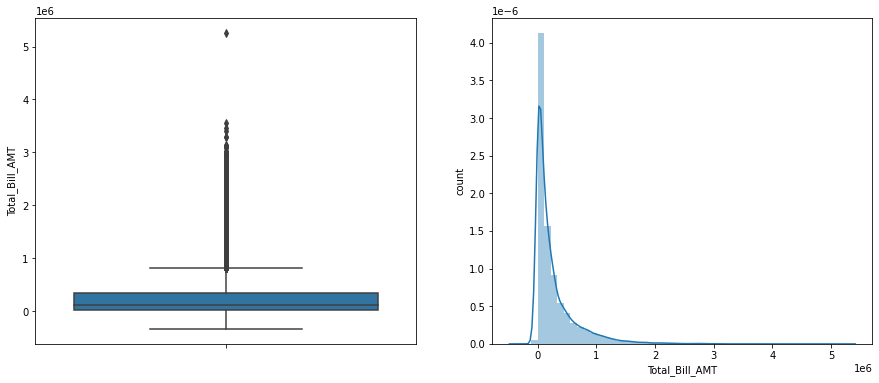

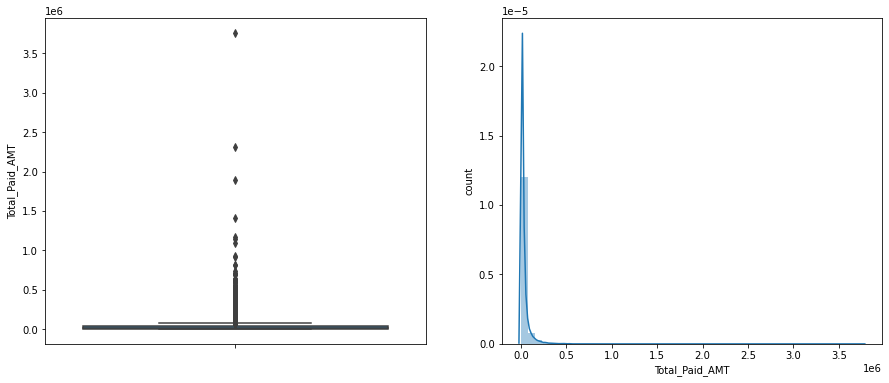

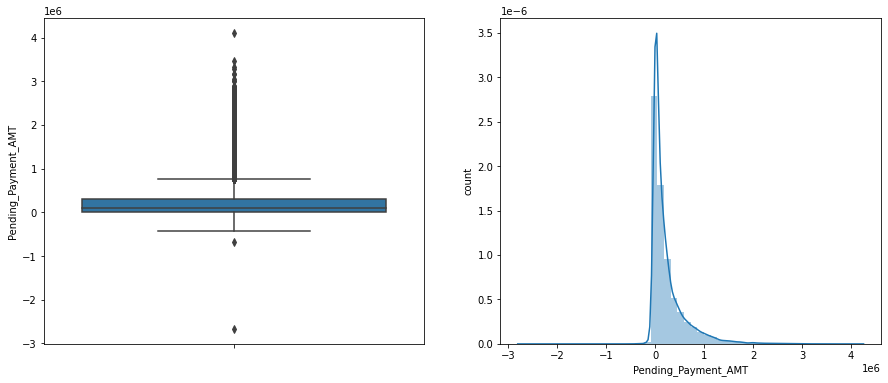

In [68]:
for var in continuous:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=credit_df[var])
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = sns.distplot(credit_df[var].dropna())
    fig.set_ylabel('count')
    fig.set_xlabel(var)

    plt.show()

Outliers can be visualised as the dots outside the whiskers in the boxplots. The majority of the continuous and discrete variables seem to contain outliers. In addition, the majority of the variables are not normally distributed.

We are not removing any of the outliers as of now because it may lead to information loss since our dataset is small and our model will not be able to train well if we remove few records due to outliers . 

It's not always adviced to remove outliers inorder to increase the accuracy of the model,here our data records are compartively low in number.Hence we have decided not to remove the outliers as of now

#**Binning**

In [69]:
# Bin ‘AGE’ data to 6 groups
bins= [21,30,40,50,60,70,80]
labels = list(range(6))
credit_df['AGE'] = pd.cut(credit_df['AGE'],bins=bins, labels=labels,right=False)

from sklearn.preprocessing import LabelEncoder
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
credit_df['AGE_Encoded'] = labelencoder.fit_transform(credit_df['AGE'])
credit_df['AGE_Encoded'].value_counts()

1    11226
0     9603
2     6456
3     2341
4      314
5       25
Name: AGE_Encoded, dtype: int64

In [70]:
##droping the old age column
credit_df = credit_df.drop('AGE',axis=1)

In [71]:
credit_df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3',
       'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'defaulter',
       'Total_Bill_AMT', 'Total_Paid_AMT', 'Pending_Payment_AMT',
       'AGE_Encoded'],
      dtype='object')

# **One Hot Encoding**

In [72]:
credit_df = pd.get_dummies(credit_df, columns = ['EDUCATION', 'MARRIAGE','SEX','PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'])

In [73]:
credit_df.columns

Index(['LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'defaulter', 'Total_Bill_AMT',
       'Total_Paid_AMT', 'Pending_Payment_AMT', 'AGE_Encoded', 'EDUCATION_1',
       'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4', 'MARRIAGE_1', 'MARRIAGE_2',
       'MARRIAGE_3', 'SEX_1', 'SEX_2', 'PAY_1_0', 'PAY_1_1', 'PAY_1_2',
       'PAY_1_3', 'PAY_1_4', 'PAY_1_5', 'PAY_1_6', 'PAY_1_7', 'PAY_1_8',
       'PAY_2_0', 'PAY_2_1', 'PAY_2_2', 'PAY_2_3', 'PAY_2_4', 'PAY_2_5',
       'PAY_2_6', 'PAY_2_7', 'PAY_2_8', 'PAY_3_0', 'PAY_3_1', 'PAY_3_2',
       'PAY_3_3', 'PAY_3_4', 'PAY_3_5', 'PAY_3_6', 'PAY_3_7', 'PAY_3_8',
       'PAY_4_0', 'PAY_4_1', 'PAY_4_2', 'PAY_4_3', 'PAY_4_4', 'PAY_4_5',
       'PAY_4_6', 'PAY_4_7', 'PAY_4_8', 'PAY_5_0', 'PAY_5_2', 'PAY_5_3',
       'PAY_5_4', 'PAY_5_5', 'PAY_5_6', 'PAY_5_7', 'PAY_5_8', 'PAY_6_0',
       'PAY_6_2', 'PAY_6_3', 'PAY_6_4', 'PAY

#**Data Preparation for Model Buliding**






In [74]:
# created a copy of our dataset for modeling
credit_card_df=credit_df.copy()        

In [75]:
#Initially we have decided to train our baseline model with all features
X = credit_card_df.drop(columns=['defaulter']) #Independent features
y = credit_card_df['defaulter'] #Dependent features

In [76]:
features = ['LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'Total_Bill_AMT', 'Total_Paid_AMT', 'Pending_Payment_AMT','AGE_Encoded']

#**Handling Imbalance Target Variable** (SMOTE)



###Imbalanced dataset is a type of dataset where the distribution of labels across the dataset is not balanced i.e. the distribution is biased or skewed. Group having more data points/samples is known as majority class where the group having less data points is known as minority class.

###Credit card default prediction (defaulters are very few among all financial transaction)

###In such cases, minority class is more important than the majority class and the motive of classifier is to effectively classify the minority class from the majority class e.g. identify default transaction from all transactions. Such high imbalanced distribution pose a challenge for class prediction.

###There are many techniques available to handle class imbalance. One of the popular techniques is up-sampling (e.g. SMOTE) in which more similar data points are added to minority class to make class distribution equal. On this up-sampled modified data, any classifier can be applied.

###Handling the imbalance is really a crucial step to carried out.We have used S.M.O.T.E Technique to solve this problem

In [77]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X,y)

print('Original dataset shape', len(credit_card_df))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 29965
Resampled dataset shape 46670


In [78]:
y_smote.value_counts()

1    23335
0    23335
Name: defaulter, dtype: int64

#**Spliting the data into train and test** (70% train,30% test)

In [79]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size = 0.3, random_state = 42)

In [80]:
X_train.shape ,X_test.shape

((32669, 78), (14001, 78))

#**Scaling the Independent features** (Standard Scalar)

In [81]:
sc= StandardScaler()
X_train[features]=sc.fit_transform(X_train[features]) # fit on training data columns and transform the training data columns
X_test[features]=sc.transform(X_test[features]) # transform the testing data columns

#**Model buliding** (Baseline model)

##Comparing different models and finally selecting the best model after Optimization

In [247]:
from pandas.core.common import random_state
def model_score(model_name, model, X_train,
                X_test, y_train, y_test, test=False):
    

    my_model = model
    my_model.fit(X_train,y_train)
    
    print(f'{model_name}  training accuracy score: {my_model.score(X_train,y_train):.4}\n')
    print(f'{model_name} test accuracy score: {my_model.score(X_test,y_test):.4}\n')
    
    
    return my_model
  
lr = model_score('LogReg', LogisticRegression(random_state=42),
                       X_train, X_test,
                       y_train, y_test,test=False)

svc = model_score('SVM', SVC(random_state=42),
                       X_train, X_test,
                       y_train,y_test,test=False)

knn = model_score('KNN', KNeighborsClassifier(),
                       X_train,X_test,
                       y_train,y_test,test=False)

gbm = model_score('XGBoost', XGBClassifier(random_state=42),
                       X_train,X_test,
                       y_train,y_test,test=False)


rf = model_score('RF', RandomForestClassifier(random_state=42),
                       X_train,X_test,
                       y_train,y_test,test=False)

nb = model_score('NB',GaussianNB(),
                       X_train, X_test,
                       y_train,y_test,test=False)








        







LogReg  training accuracy score: 0.8745

LogReg test accuracy score: 0.8755

SVM  training accuracy score: 0.874

SVM test accuracy score: 0.8711

KNN  training accuracy score: 0.8925

KNN test accuracy score: 0.8423

XGBoost  training accuracy score: 0.8739

XGBoost test accuracy score: 0.8747

RF  training accuracy score: 0.9983

RF test accuracy score: 0.8765

NB  training accuracy score: 0.6457

NB test accuracy score: 0.6445



## The Random Forest and KNN Model are actually overfitting with high train accuracy(low Bias) and Low Test Accuracy(High Variance) while we take into consideration default parameters of the respective models.


## The XGBoostModel,S.V.M and Logistic Regression Models provide us with good train and test accuracy.

## The Gaussian Naive Bayes Model gave us the lowest train and test accuracy.


#**Optimization**

###What are we optimizing for?

###Using accuracy score as a evaluation metrics for such highly imbalanced dataset is not a good measure of classifier performance.

###In such cases, evaluation metrics like ROC-AUC curve are a good indicator of classifier performance. It is a measure of how good model is at distinguishing between various class. Higher the ROC-AUC score, better the model is at predicting 0s as 0s and 1s as 1s. Just to remind, ROC is a probability curve and AUC represents degree or measure of separability. Apart from this metric, we will also check on recall score, false-positive (FP) and false-negative (FN) score as we build our classifier



###**Ideally, we do not want to miss any potentially defaults to fall through the cracks, so our optimal model will minimize False Negatives (optimize Recall Score)**

#**Evaluation Metrics**

##**Logistic Regression**

###Classification Report

In [83]:
y_pred_lr = lr.predict(X_test)

In [84]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.83      0.95      0.88      6983
           1       0.94      0.80      0.87      7018

    accuracy                           0.88     14001
   macro avg       0.88      0.88      0.87     14001
weighted avg       0.88      0.88      0.87     14001



###Confusion Matrix

In [85]:
cm = confusion_matrix(y_test, y_pred_lr)
print(cm)

[[6631  352]
 [1391 5627]]


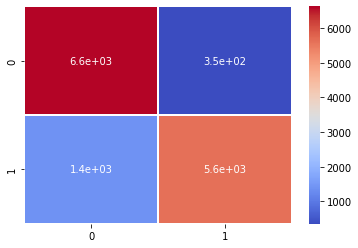

In [86]:
sns.heatmap(cm,annot= True,linewidths=1,cmap= 'coolwarm')

In [204]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred_lr)
acc = accuracy_score(y_test, y_pred_lr)
prec = precision_score(y_test, y_pred_lr)
rec = recall_score(y_test, y_pred_lr)
f1 = f1_score(y_test, y_pred_lr)

model_result = pd.DataFrame([['Logistic Regression', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

model_result


,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.87608,0.935245,0.808777,0.867426,0.876249


#**Hyperparameter Tuning using GridSearchCV**

##**Logistic Regression**

In [88]:
#Parameters to be used
penalty = ['l1', 'l2','elasticnet']
c_values = [100, 10, 1.0, 0.1, 0.01,0.001]
class_weight = [{0:10, 1:12}, 'balanced']
solver = ['saga']
grid = dict(penalty=penalty,C=c_values, class_weight=class_weight)

In [89]:
lrm = LogisticRegression(random_state=42)
grid_lr = GridSearchCV(estimator=lr, param_grid=grid,verbose=2, n_jobs=-1, cv=3, scoring='recall')

In [90]:
grid_lr.fit(X_train,y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01, 0.001],
                         'class_weight': [{0: 10, 1: 12}, 'balanced'],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='recall', verbose=2)

In [91]:
grid_lr.best_params_

{'C': 1.0, 'class_weight': {0: 10, 1: 12}, 'penalty': 'l2'}

###C is known as a "hyperparameter." The parameters are numbers that tell the model what to do with the characteristics, whereas the hyperparameters instruct the model on how to choose parameters.
###Regularization will penalize the extreme parameters, the extreme values in the training data lead to overfitting.
###A high value of C tells the model to give more weight to the training data. A lower value of C will indicate the model gives complexity more weight at the cost of fitting the data. Thus, a high Hyper Parameter value C indicates that training data is more important and reflects the real-world data, whereas a low value is just the opposite of this

#**Evaluation Metrics**

##**Logistic Regression**(After Hyperparameter tuning)

###Check for Overfit

In [92]:
y_pred_lr= grid_lr.predict(X_test)  # predicting on test data
y_pred_train_lr = grid_lr.predict(X_train) # predicting on train data

print(f'Train Accuracy: {accuracy_score(y_train,y_pred_train_lr)}')
print(f'Test Accuracy: {accuracy_score(y_test, y_pred_lr)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred_lr)}')

Train Accuracy: 0.8747742508188191
Test Accuracy: 0.8760802799800014
Area Under Curve: 0.8762489467255229


###Classification Report

In [93]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88      6983
           1       0.94      0.81      0.87      7018

    accuracy                           0.88     14001
   macro avg       0.88      0.88      0.88     14001
weighted avg       0.88      0.88      0.88     14001



In [94]:
cm=confusion_matrix(y_test, y_pred_lr)
print(cm)

[[6590  393]
 [1342 5676]]


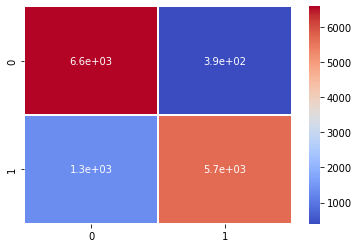

In [95]:
sns.heatmap(cm,annot= True,linewidths=1,cmap= 'coolwarm')

In [205]:
roc=roc_auc_score(y_test, y_pred_lr)
acc = accuracy_score(y_test, y_pred_lr)
prec = precision_score(y_test, y_pred_lr)
rec = recall_score(y_test, y_pred_lr)
f1 = f1_score(y_test, y_pred_lr)

model = pd.DataFrame([['Logistic Regression Tuned', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

model_result = model_result.append(model, ignore_index = True)
model_result

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.87608,0.935245,0.808777,0.867426,0.876249
1,Logistic Regression Tuned,0.87608,0.935245,0.808777,0.867426,0.876249


#**Evaluation Metrics**

##**Support Vector Machine**

###Check for Overfit

In [97]:
y_pred_test_svm = svc.predict(X_test)
y_pred_train_svm = svc.predict(X_train)
print(f'Train Accuracy: {accuracy_score(y_train, y_pred_train_svm)}')
print(f'Test Accuracy: {accuracy_score(y_test, y_pred_test_svm)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred_test_svm)}')

Train Accuracy: 0.8740089993571888
Test Accuracy: 0.8710806370973502
Area Under Curve: 0.8712831965363752


###Classification Report

In [98]:
print(classification_report(y_test, y_pred_test_svm))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      6983
           1       0.94      0.79      0.86      7018

    accuracy                           0.87     14001
   macro avg       0.88      0.87      0.87     14001
weighted avg       0.88      0.87      0.87     14001



###Confusion Matrix

In [99]:
cm = confusion_matrix(y_test, y_pred_test_svm)
print(cm)

[[6650  333]
 [1472 5546]]


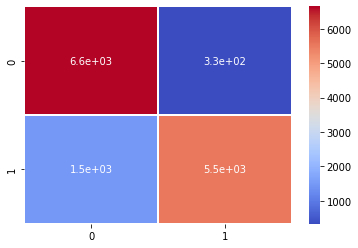

In [100]:
sns.heatmap(cm,annot= True,linewidths=1,cmap= 'coolwarm')

In [206]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test,y_pred_test_svm)
acc = accuracy_score(y_test, y_pred_test_svm)
prec = precision_score(y_test,y_pred_test_svm)
rec = recall_score(y_test, y_pred_test_svm)
f1 = f1_score(y_test, y_pred_test_svm)

model = pd.DataFrame([['Support Vector Machine', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

model_result = model_result.append(model, ignore_index = True)
model_result

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.876080,0.935245,0.808777,0.867426,0.876249
1,Logistic Regression Tuned,0.876080,0.935245,0.808777,0.867426,0.876249
2,Support Vector Machine,0.871081,0.943358,0.790254,0.860045,0.871283


#**Hyperparameter Tuning using GridSearchCV**

##**Support vector machine**

In [102]:
svc_params = [{'gamma':[0.001,0.01,1],'kernel':['rbf'],'C':[1,10,100]}]
svc = SVC(random_state=42)

### 0.0001 < gamma < 10  (0.001, 0.01, 0.1, 1, 10, 100)    
### 0.1 < C < 100 (0.001, 0.01, 0.1, 1, 10, 100)

In [103]:
gridCV= GridSearchCV(estimator= svc, param_grid=svc_params, scoring='recall',cv=3, verbose = 3)
grid_svm =gridCV.fit(X_train,y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END ......C=1, gamma=0.001, kernel=rbf;, score=0.757 total time= 1.1min
[CV 2/3] END ......C=1, gamma=0.001, kernel=rbf;, score=0.770 total time= 1.2min
[CV 3/3] END ......C=1, gamma=0.001, kernel=rbf;, score=0.743 total time= 1.2min
[CV 1/3] END .......C=1, gamma=0.01, kernel=rbf;, score=0.771 total time= 1.1min
[CV 2/3] END .......C=1, gamma=0.01, kernel=rbf;, score=0.783 total time=  59.7s
[CV 3/3] END .......C=1, gamma=0.01, kernel=rbf;, score=0.771 total time=  59.4s
[CV 1/3] END ..........C=1, gamma=1, kernel=rbf;, score=0.747 total time= 4.8min
[CV 2/3] END ..........C=1, gamma=1, kernel=rbf;, score=0.747 total time= 4.8min
[CV 3/3] END ..........C=1, gamma=1, kernel=rbf;, score=0.748 total time= 4.3min
[CV 1/3] END .....C=10, gamma=0.001, kernel=rbf;, score=0.777 total time=  59.8s
[CV 2/3] END .....C=10, gamma=0.001, kernel=rbf;, score=0.789 total time= 1.0min
[CV 3/3] END .....C=10, gamma=0.001, kernel=rbf;,

In [104]:
print("Best Parameters:",grid_svm.best_params_)

Best Parameters: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}


In [105]:
print("Train Score:",grid_svm.best_score_)

Train Score: 0.7974505117362259


In [106]:
print("Test Score:",grid_svm.score(X_test,y_test))

Test Score: 0.804645198062126


#**Evaluation Metrics**

##**Support Vector Machine** (After Hyperparmeter tuning)

###Check for Overfit

In [107]:
y_pred_test_svm1 = grid_svm.predict(X_test)
y_pred_train_svm1 = grid_svm.predict(X_train)
print(f'Train Accuracy: {accuracy_score(y_train, y_pred_train_svm1)}')
print(f'Test Accuracy: {accuracy_score(y_test, y_pred_test_svm1)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred_test_svm1)}')

Train Accuracy: 0.8807126021610702
Test Accuracy: 0.8748660809942147
Area Under Curve: 0.8750420605805403


###Classification Report

In [108]:
print(classification_report(y_test,y_pred_test_svm1))

              precision    recall  f1-score   support

           0       0.83      0.95      0.88      6983
           1       0.94      0.80      0.87      7018

    accuracy                           0.87     14001
   macro avg       0.88      0.88      0.87     14001
weighted avg       0.88      0.87      0.87     14001



###Confusion Matrix

In [109]:
cm = confusion_matrix(y_test, y_pred_test_svm1)
print(cm)

[[6602  381]
 [1371 5647]]


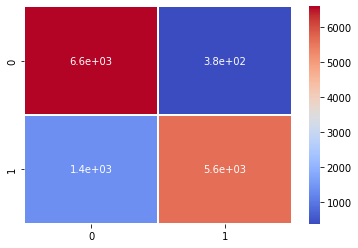

In [110]:
sns.heatmap(cm,annot= True,linewidths=1,cmap= 'coolwarm')

In [207]:
roc=roc_auc_score(y_test, y_pred_test_svm1)
acc = accuracy_score(y_test, y_pred_test_svm1)
prec = precision_score(y_test, y_pred_test_svm1)
rec = recall_score(y_test, y_pred_test_svm1)
f1 = f1_score(y_test, y_pred_test_svm1)
model =  pd.DataFrame([['Support Vector Machine  Tuned', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model_result = model_result.append(model, ignore_index = True)
model_result

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.876080,0.935245,0.808777,0.867426,0.876249
1,Logistic Regression Tuned,0.876080,0.935245,0.808777,0.867426,0.876249
2,Support Vector Machine,0.871081,0.943358,0.790254,0.860045,0.871283
3,Support Vector Machine Tuned,0.874866,0.936795,0.804645,0.865706,0.875042


# **Evaluation Metrics**

##**K- Nearest Neighbour**

###Classification Report

In [113]:
y_pred_knn = knn.predict(X_test)

In [114]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.82      0.87      0.85      6983
           1       0.87      0.81      0.84      7018

    accuracy                           0.84     14001
   macro avg       0.84      0.84      0.84     14001
weighted avg       0.84      0.84      0.84     14001



###Confusion Matrix

In [115]:
cm = confusion_matrix(y_test, y_pred_knn)
print(cm)

[[6108  875]
 [1333 5685]]


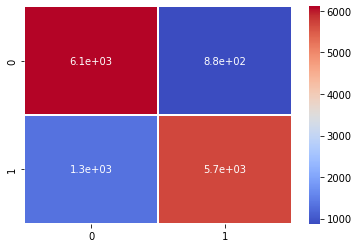

In [116]:
sns.heatmap(cm,annot= True,linewidths=1,cmap= 'coolwarm')

In [208]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred_knn)
acc = accuracy_score(y_test, y_pred_knn)
prec = precision_score(y_test, y_pred_knn)
rec = recall_score(y_test, y_pred_knn)
f1 = f1_score(y_test, y_pred_knn)

model = pd.DataFrame([['K-Nearest Neighbour', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

model_result = model_result.append(model, ignore_index = True)
model_result

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.876080,0.935245,0.808777,0.867426,0.876249
1,Logistic Regression Tuned,0.876080,0.935245,0.808777,0.867426,0.876249
2,Support Vector Machine,0.871081,0.943358,0.790254,0.860045,0.871283
3,Support Vector Machine Tuned,0.874866,0.936795,0.804645,0.865706,0.875042
4,K-Nearest Neighbour,0.842297,0.866616,0.810060,0.837384,0.842378


#**Hyperparameter Tuning using GridSearchCV**

##  **K-Nearest Neighbour**

###Elbow method to find the optimal value of K

In [118]:
error_rate = []

for i in range(1,30):
    
    knn = KNeighborsClassifier(n_neighbors=i,n_jobs=-1)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

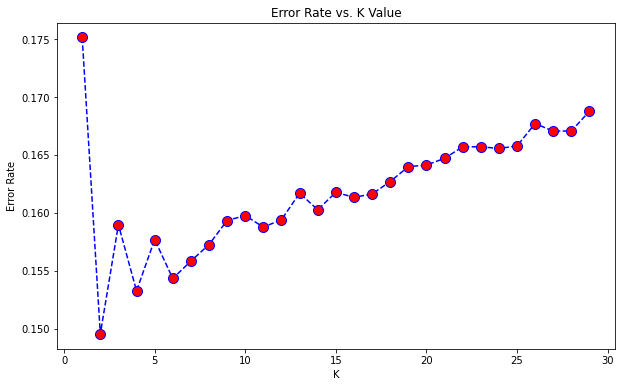

In [119]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

###From the above elbow plot ,we can see a clear elbow like shape formed when the k value is 2,hence we select k equal to 2 the optimal k value.The error rate at k=2 also is the least compared to other values of k.

In [120]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier()

In [121]:
k_range = [2,3,4,5,6,7,8,9,10,15,20,25,30]
leaf_size = [1,5,10,15,20,25,30]
weight_options = ['uniform', 'distance']
knn_param = {'n_neighbors': k_range,'leaf_size': leaf_size, 'weights': weight_options}

In [122]:
grid_search = GridSearchCV(estimator = knn,param_grid = knn_param,scoring='recall',cv=5,verbose=2)   #59 mins
grid_knn = grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 182 candidates, totalling 910 fits
[CV] END ........leaf_size=1, n_neighbors=2, weights=uniform; total time=   2.8s
[CV] END ........leaf_size=1, n_neighbors=2, weights=uniform; total time=   2.8s
[CV] END ........leaf_size=1, n_neighbors=2, weights=uniform; total time=   2.9s
[CV] END ........leaf_size=1, n_neighbors=2, weights=uniform; total time=   2.8s
[CV] END ........leaf_size=1, n_neighbors=2, weights=uniform; total time=   2.8s
[CV] END .......leaf_size=1, n_neighbors=2, weights=distance; total time=   2.7s
[CV] END .......leaf_size=1, n_neighbors=2, weights=distance; total time=   3.2s
[CV] END .......leaf_size=1, n_neighbors=2, weights=distance; total time=   3.5s
[CV] END .......leaf_size=1, n_neighbors=2, weights=distance; total time=   2.6s
[CV] END .......leaf_size=1, n_neighbors=2, weights=distance; total time=   2.6s
[CV] END ........leaf_size=1, n_neighbors=3, weights=uniform; total time=   3.1s
[CV] END ........leaf_size=1, n_neighbors=3, w

In [123]:
best_accuracy_knn = grid_knn.best_score_
print('Accuracy on Cross Validation set :',best_accuracy_knn)

Accuracy on Cross Validation set : 0.8337929954390584


In [124]:
best_parameters_knn = grid_knn.best_params_
best_parameters_knn

{'leaf_size': 1, 'n_neighbors': 2, 'weights': 'distance'}

# **Evaluation Metrics**

##**K- Nearest Neighbour**(After Hyperparameter tuning)

###Check for Overfit

In [125]:
y_pred_test_knn = grid_knn.predict(X_test)
y_pred_train_knn = grid_knn.predict(X_train)
print(f'Train Accuracy: {accuracy_score(y_train, y_pred_train_knn)}')
print(f'Test Accuracy: {accuracy_score(y_test, y_pred_test_knn)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred_test_knn)}')

Train Accuracy: 0.9980409562582264
Test Accuracy: 0.8252981929862153
Area Under Curve: 0.8252567496187356


###Classification Report

In [126]:
print(classification_report(y_test, y_pred_test_knn))

              precision    recall  f1-score   support

           0       0.84      0.81      0.82      6983
           1       0.82      0.84      0.83      7018

    accuracy                           0.83     14001
   macro avg       0.83      0.83      0.83     14001
weighted avg       0.83      0.83      0.83     14001



###Confusion Matrix

In [127]:
cm = confusion_matrix(y_test, y_pred_test_knn)
print(cm)

[[5647 1336]
 [1110 5908]]


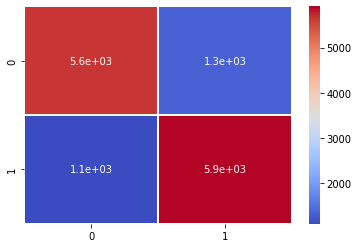

In [128]:
sns.heatmap(cm,annot= True,linewidths=1,cmap= 'coolwarm')

In [209]:
roc=roc_auc_score(y_test, y_pred_test_knn)
acc = accuracy_score(y_test, y_pred_test_knn)
prec = precision_score(y_test, y_pred_test_knn)
rec = recall_score(y_test, y_pred_test_knn)
f1 = f1_score(y_test, y_pred_test_knn)
model =  pd.DataFrame([['K-Nearest Neighbour Model Tuned', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model_result = model_result.append(model, ignore_index = True)
model_result

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.876080,0.935245,0.808777,0.867426,0.876249
1,Logistic Regression Tuned,0.876080,0.935245,0.808777,0.867426,0.876249
2,Support Vector Machine,0.871081,0.943358,0.790254,0.860045,0.871283
3,Support Vector Machine Tuned,0.874866,0.936795,0.804645,0.865706,0.875042
4,K-Nearest Neighbour,0.842297,0.866616,0.810060,0.837384,0.842378
5,K-Nearest Neighbour Model Tuned,0.825298,0.815572,0.841835,0.828495,0.825257


#**Evaluation Metrics**

##**XGBoost**



### Classification Report

In [130]:
y_pred_gbm = gbm.predict(X_test)
print(classification_report(y_test, y_pred_gbm))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88      6983
           1       0.93      0.81      0.87      7018

    accuracy                           0.87     14001
   macro avg       0.88      0.87      0.87     14001
weighted avg       0.88      0.87      0.87     14001



## Confusion Matrix

In [131]:
y_pred_gbm = gbm.predict(X_test)
cm = confusion_matrix(y_test, y_pred_gbm)
print(cm)

[[6564  419]
 [1336 5682]]


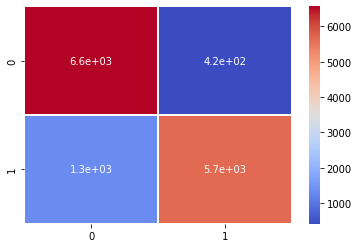

In [132]:
sns.heatmap(cm,annot= True,linewidths=1,cmap= 'coolwarm')                   
                            

In [210]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred_gbm)
acc = accuracy_score(y_test, y_pred_gbm)
prec = precision_score(y_test, y_pred_gbm)
rec = recall_score(y_test, y_pred_gbm)
f1 = f1_score(y_test, y_pred_gbm)

model = pd.DataFrame([['XGBoost', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

model_result = model_result.append(model, ignore_index = True)
model_result

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.876080,0.935245,0.808777,0.867426,0.876249
1,Logistic Regression Tuned,0.876080,0.935245,0.808777,0.867426,0.876249
2,Support Vector Machine,0.871081,0.943358,0.790254,0.860045,0.871283
3,Support Vector Machine Tuned,0.874866,0.936795,0.804645,0.865706,0.875042
4,K-Nearest Neighbour,0.842297,0.866616,0.810060,0.837384,0.842378
5,K-Nearest Neighbour Model Tuned,0.825298,0.815572,0.841835,0.828495,0.825257
6,XGBoost,0.874652,0.931323,0.809632,0.866225,0.874815




###The XGBoost model gave us a precision score of (0.80), recall score(0.75) and f1-score(0.78) for the class 1 (target variable) i.e defaulter. 




## **Optimizing the Recall score**

###From our model confusion matrix we can find that the number of -

### true positive - 5718
### false positive - 1265
### false negative  - 1688
### true negative  - 5330

### Our aim will be to reduce the false negative count because it will enhance the recall evaluation metric of our model. Since our problem statement is to predict the credit card defaulter,hence recall is our key parameter to focus among  the evaluation metrics.

### The optimization of recall value basically  help us in not missing any credit card defaulter from our analaysis by reducing the false negative rate in our model.

###Inorder to optimize our model recall,follows below steps-



## 1. Feature Selection/ Feature Importance

## 2. Hyperparameteric Tunning using Grid SearchCV.








#**Hyperparameter Tuning**

##**XGBoost**

###RandomizedSearchCV

In [149]:
from sklearn.model_selection import RandomizedSearchCV

In [150]:
#Parameters
n_estimators = [int(x) for x in np.linspace(10, 200, 10)]
max_features = ['auto', 'sqrt','log2']
max_depth = [int(x) for x in np.linspace(1, 10,10)]
min_child_weight = [2, 5, 10,15,20]
learning_rate = [0.0001,0.01,0.1,0.3,0.6]
gamma = [1,5,10,15,20]
reg_alpha = [0.1,0.2,0.3,0.5,0.6,0.8,1.0]
# Create the random grid
xgb_grid = {'n_estimators': n_estimators, 'max_features': max_features, 
               'max_depth': max_depth,'gamma': gamma,
             'learning_rate':learning_rate,
               'min_child_weight' : min_child_weight,
               'reg_alpha': reg_alpha }


In [151]:
xgb=XGBClassifier(random_state=42)
xgb_randomcv=RandomizedSearchCV(estimator=xgb,param_distributions=xgb_grid,n_iter=30,cv=3,scoring='recall',verbose=2,
                               )
xgb_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV] END gamma=10, learning_rate=0.0001, max_depth=7, max_features=auto, min_child_weight=10, n_estimators=178, reg_alpha=0.6; total time=  38.8s
[CV] END gamma=10, learning_rate=0.0001, max_depth=7, max_features=auto, min_child_weight=10, n_estimators=178, reg_alpha=0.6; total time=  25.0s
[CV] END gamma=10, learning_rate=0.0001, max_depth=7, max_features=auto, min_child_weight=10, n_estimators=178, reg_alpha=0.6; total time=  25.1s
[CV] END gamma=15, learning_rate=0.0001, max_depth=4, max_features=auto, min_child_weight=15, n_estimators=157, reg_alpha=0.2; total time=  10.7s
[CV] END gamma=15, learning_rate=0.0001, max_depth=4, max_features=auto, min_child_weight=15, n_estimators=157, reg_alpha=0.2; total time=  10.7s
[CV] END gamma=15, learning_rate=0.0001, max_depth=4, max_features=auto, min_child_weight=15, n_estimators=157, reg_alpha=0.2; total time=  10.7s
[CV] END gamma=10, learning_rate=0.1, max_depth=9, max_features

RandomizedSearchCV(cv=3, estimator=XGBClassifier(random_state=42), n_iter=30,
                   param_distributions={'gamma': [1, 5, 10, 15, 20],
                                        'learning_rate': [0.0001, 0.01, 0.1,
                                                          0.3, 0.6],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_child_weight': [2, 5, 10, 15, 20],
                                        'n_estimators': [10, 31, 52, 73, 94,
                                                         115, 136, 157, 178,
                                                         200],
                                        'reg_alpha': [0.1, 0.2, 0.3, 0.5, 0.6,
                                                    

In [152]:
#Checking the best parameters
xgb_randomcv.best_params_

{'reg_alpha': 0.5,
 'n_estimators': 52,
 'min_child_weight': 20,
 'max_features': 'log2',
 'max_depth': 10,
 'learning_rate': 0.1,
 'gamma': 10}

In [153]:
#Checking  the best estimator
xgb_randomcv.best_estimator_

XGBClassifier(gamma=10, max_depth=10, max_features='log2', min_child_weight=20,
              n_estimators=52, random_state=42, reg_alpha=0.5)

In [154]:
best_param_grid=xgb_randomcv.best_estimator_
y_pred=best_param_grid.predict(X_test)

###GridSearchCv

In [228]:
param_grid_ = {
    'learning_rate': [xgb_randomcv.best_params_['learning_rate']],
    'max_depth': [xgb_randomcv.best_params_['max_depth']] ,
    'reg_alpha': [xgb_randomcv.best_params_['reg_alpha']],
    'max_features': [xgb_randomcv.best_params_['max_features']],
    'min_child_weight': [xgb_randomcv.best_params_['min_child_weight'], 
                         xgb_randomcv.best_params_['min_child_weight']+2, 
                         xgb_randomcv.best_params_['min_child_weight'] + 4],
    'gamma': [xgb_randomcv.best_params_['gamma'] - 2,
                         xgb_randomcv.best_params_['gamma'], 
                         xgb_randomcv.best_params_['gamma'] + 2], 
                          
                          
    'n_estimators': [xgb_randomcv.best_params_['n_estimators'] - 50, xgb_randomcv.best_params_['n_estimators'] - 25, 
                     xgb_randomcv.best_params_['n_estimators'], 
                     xgb_randomcv.best_params_['n_estimators'] + 25, xgb_randomcv.best_params_['n_estimators'] + 50]
}

print(param_grid_)

{'learning_rate': [0.1], 'max_depth': [10], 'reg_alpha': [0.5], 'max_features': ['log2'], 'min_child_weight': [20, 22, 24], 'gamma': [8, 10, 12], 'n_estimators': [2, 27, 52, 77, 102]}


In [229]:
grid_search_xgb=GridSearchCV(estimator=xgb,param_grid=param_grid_,cv=3,scoring='recall', verbose=2)
grid_search_xgb.fit(X_train,y_train)

Fitting 3 folds for each of 45 candidates, totalling 135 fits
[CV] END gamma=8, learning_rate=0.1, max_depth=10, max_features=log2, min_child_weight=20, n_estimators=2, reg_alpha=0.5; total time=   0.6s
[CV] END gamma=8, learning_rate=0.1, max_depth=10, max_features=log2, min_child_weight=20, n_estimators=2, reg_alpha=0.5; total time=   0.6s
[CV] END gamma=8, learning_rate=0.1, max_depth=10, max_features=log2, min_child_weight=20, n_estimators=2, reg_alpha=0.5; total time=   0.6s
[CV] END gamma=8, learning_rate=0.1, max_depth=10, max_features=log2, min_child_weight=20, n_estimators=27, reg_alpha=0.5; total time=   5.1s
[CV] END gamma=8, learning_rate=0.1, max_depth=10, max_features=log2, min_child_weight=20, n_estimators=27, reg_alpha=0.5; total time=   4.9s
[CV] END gamma=8, learning_rate=0.1, max_depth=10, max_features=log2, min_child_weight=20, n_estimators=27, reg_alpha=0.5; total time=   4.9s
[CV] END gamma=8, learning_rate=0.1, max_depth=10, max_features=log2, min_child_weight=20

GridSearchCV(cv=3, estimator=XGBClassifier(random_state=42),
             param_grid={'gamma': [8, 10, 12], 'learning_rate': [0.1],
                         'max_depth': [10], 'max_features': ['log2'],
                         'min_child_weight': [20, 22, 24],
                         'n_estimators': [2, 27, 52, 77, 102],
                         'reg_alpha': [0.5]},
             scoring='recall', verbose=2)

In [230]:
#Checking for best estimator
grid_search_xgb.best_estimator_

XGBClassifier(gamma=10, max_depth=10, max_features='log2', min_child_weight=22,
              n_estimators=27, random_state=42, reg_alpha=0.5)

In [231]:
best_grid1=grid_search_xgb.best_estimator_

In [232]:
best_score_xgb = grid_search_xgb.best_score_
print('Scoring on Cross Validation set :',best_score_xgb)

Scoring on Cross Validation set : 0.8139976711405282


In [141]:
#param_grid_xgb ={'n_estimators': [500], 'max_depth': [4], 'gamma': [15],'learning_rate':[0.3], 'subsample':[0.4],'colsample_bytree':[0.4],'reg_alpha':[0.6],'min_child_weight' : [10]}


#**Evaluation Metrics**

##**XGBoost** (After Hyperparameter Tuning)

##Check for Overfit

In [163]:
y_pred_test_xgb = grid_search_xgb.predict(X_test)  # predicting on test data
y_pred_train_xgb = grid_search_xgb.predict(X_train) # predicting on train data
print('Accuracy on Training  and Test Data :')

print(accuracy_score(y_train,y_pred_train_xgb))

print(accuracy_score(y_test, y_pred_test_xgb))

Accuracy on Training  and Test Data :
0.8766108543267318
0.875008927933719


###Classification Report

In [164]:
print((classification_report(y_test, y_pred_test_xgb)))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88      6983
           1       0.92      0.82      0.87      7018

    accuracy                           0.88     14001
   macro avg       0.88      0.88      0.87     14001
weighted avg       0.88      0.88      0.87     14001



###Confusion Matrix

In [165]:
cm = confusion_matrix(y_test, y_pred_test_xgb)
print(cm)

[[6484  499]
 [1251 5767]]


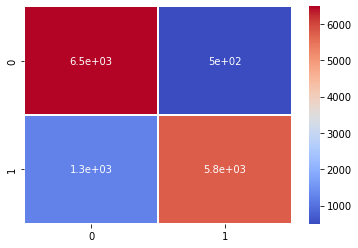

In [166]:
sns.heatmap(cm,annot= True,linewidths=1,cmap= 'coolwarm') 

In [211]:
roc=roc_auc_score(y_test, y_pred_test_xgb)
acc = accuracy_score(y_test, y_pred_test_xgb)
prec = precision_score(y_test,y_pred_test_xgb)
rec = recall_score(y_test,y_pred_test_xgb)
f1 = f1_score(y_test,y_pred_test_xgb)
model =  pd.DataFrame([['XGBOOST Tuned', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model_result = model_result.append(model, ignore_index = True)
model_result

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.876080,0.935245,0.808777,0.867426,0.876249
1,Logistic Regression Tuned,0.876080,0.935245,0.808777,0.867426,0.876249
2,Support Vector Machine,0.871081,0.943358,0.790254,0.860045,0.871283
3,Support Vector Machine Tuned,0.874866,0.936795,0.804645,0.865706,0.875042
4,K-Nearest Neighbour,0.842297,0.866616,0.810060,0.837384,0.842378
5,K-Nearest Neighbour Model Tuned,0.825298,0.815572,0.841835,0.828495,0.825257
6,XGBoost,0.874652,0.931323,0.809632,0.866225,0.874815
7,XGBOOST Tuned,0.875009,0.920364,0.821744,0.868263,0.875142


#**Feature Selection using Embedded Method**

##**XGBoost**




###These methods encompass the benefits of both the wrapper and filter methods, by including interactions of features but also maintaining reasonable computational cost. Embedded methods are iterative in the sense that takes care of each iteration of the model training process and carefully extracts those features which contribute the most to the training for a particular iteration.

###There are many feature selection scores one could perform to determine which features are most useful. For this case, we will use Feature Importance.

###Feature Importance is the process of assigning scores to each feature, depending on how useful it is in predicting the target variable

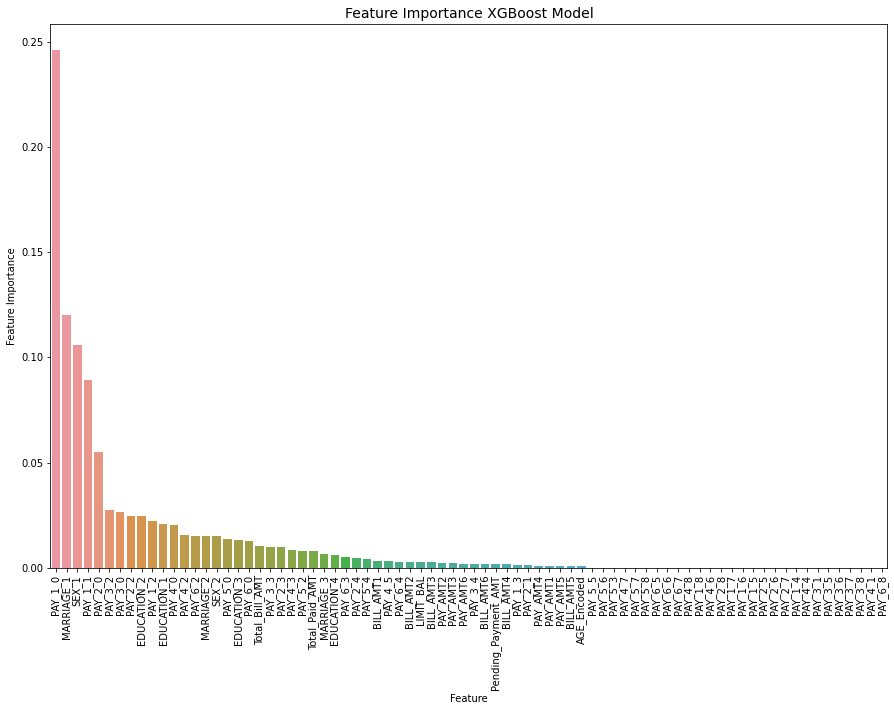

In [171]:
temp = pd.DataFrame({'Feature': list(x_smote.columns), 'Feature Importance': gbm.feature_importances_})
temp = temp.sort_values(by="Feature Importance", ascending=False)

plt.figure(figsize=(15,10))
plt.title('Feature Importance XGBoost Model', fontsize=14)
s=sns.barplot(x='Feature', y='Feature Importance', data=temp)
s.set_xticklabels(s.get_xticklabels(), rotation=90)
plt.show();

If we remove those features which are least important and keep the most important ones, this might allow us to optimize our XGBoost Model.

#**Evaluation Metrics**

## **Random Forest**

###Classification Report

In [172]:
y_pred_test_rf = rf.predict(X_test)
y_pred_train_rf = rf.predict(X_train)
print(accuracy_score(y_train, y_pred_train_rf))
print(accuracy_score(y_test, y_pred_test_rf))

0.9982858367259482
0.8765088207985144


In [173]:
print(classification_report(y_test, y_pred_test_rf))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      6983
           1       0.91      0.84      0.87      7018

    accuracy                           0.88     14001
   macro avg       0.88      0.88      0.88     14001
weighted avg       0.88      0.88      0.88     14001



###Confusion Matrix

In [174]:
cm = confusion_matrix(y_test, y_pred_test_rf)
print(cm)

[[6378  605]
 [1124 5894]]


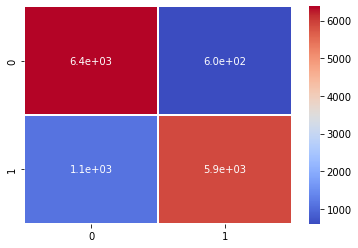

In [175]:
sns.heatmap(cm,annot= True,linewidths=1,cmap= 'coolwarm')

In [212]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test,y_pred_test_rf)
acc = accuracy_score(y_test, y_pred_test_rf)
prec = precision_score(y_test,y_pred_test_rf)
rec = recall_score(y_test, y_pred_test_rf)
f1 = f1_score(y_test, y_pred_test_rf)

model = pd.DataFrame([['Random Forest', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

model_result = model_result.append(model, ignore_index = True)
model_result

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.876080,0.935245,0.808777,0.867426,0.876249
1,Logistic Regression Tuned,0.876080,0.935245,0.808777,0.867426,0.876249
2,Support Vector Machine,0.871081,0.943358,0.790254,0.860045,0.871283
3,Support Vector Machine Tuned,0.874866,0.936795,0.804645,0.865706,0.875042
4,K-Nearest Neighbour,0.842297,0.866616,0.810060,0.837384,0.842378
5,K-Nearest Neighbour Model Tuned,0.825298,0.815572,0.841835,0.828495,0.825257
6,XGBoost,0.874652,0.931323,0.809632,0.866225,0.874815
7,XGBOOST Tuned,0.875009,0.920364,0.821744,0.868263,0.875142
8,Random Forest,0.877294,0.904210,0.844685,0.873435,0.877376


#**Hyperparameter Tuning using GridSearchCV**

##**Random Forest**

###RandomisedsearchCv

In [177]:
#Parameters
n_estimators = [int(x) for x in np.linspace(10, 800, 10)]
max_features = ['auto', 'sqrt','log2']
max_depth = [int(x) for x in np.linspace(10, 100,10)]
min_samples_split = [2, 5, 10,14]
min_samples_leaf = [1, 2, 4, 6, 8]
# Create the random grid
random_grid = {'n_estimators': n_estimators, 'max_features': max_features, 
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [10, 97, 185, 273, 361, 448, 536, 624, 712, 800], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [178]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=30,cv=3,scoring='recall',verbose=2,
                               random_state=10)
rf_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV] END criterion=entropy, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time= 1.0min
[CV] END criterion=entropy, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=  58.1s
[CV] END criterion=entropy, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=  58.4s
[CV] END criterion=gini, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=273; total time=  15.0s
[CV] END criterion=gini, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=273; total time=  13.5s
[CV] END criterion=gini, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=273; total time=  14.4s
[CV] END criterion=entropy, max_depth=30, max_features=auto, min_samples_leaf=6, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=30,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [10, 97, 185, 273, 361,
                                                         448, 536, 624, 712,
                                                         800]},
                   random_state=10, scoring='recall', verbose=2)

In [179]:
#Checking the best parameters
rf_randomcv.best_params_

{'n_estimators': 97,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 80,
 'criterion': 'gini'}

In [180]:
best_random_grid=rf_randomcv.best_estimator_
y_pred=best_random_grid.predict(X_test)

###GridSearchCv

In [181]:
param_grid = {
    'criterion': [rf_randomcv.best_params_['criterion']],
    'max_depth': [rf_randomcv.best_params_['max_depth']],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'], 
                         rf_randomcv.best_params_['min_samples_leaf']+2, 
                         rf_randomcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'] - 2,
                          rf_randomcv.best_params_['min_samples_split'] - 1,
                          rf_randomcv.best_params_['min_samples_split'], 
                          rf_randomcv.best_params_['min_samples_split'] +1,
                          rf_randomcv.best_params_['min_samples_split'] + 2],
    'n_estimators': [rf_randomcv.best_params_['n_estimators'] - 50, rf_randomcv.best_params_['n_estimators'] - 25, 
                     rf_randomcv.best_params_['n_estimators'], 
                     rf_randomcv.best_params_['n_estimators'] + 25, rf_randomcv.best_params_['n_estimators'] + 50]
}

print(param_grid)

{'criterion': ['gini'], 'max_depth': [80], 'max_features': ['auto'], 'min_samples_leaf': [1, 3, 5], 'min_samples_split': [0, 1, 2, 3, 4], 'n_estimators': [47, 72, 97, 122, 147]}


In [182]:
rf=RandomForestClassifier()
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=3,scoring='recall', verbose=2)
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 75 candidates, totalling 225 fits
[CV] END criterion=gini, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=0, n_estimators=47; total time=   0.1s
[CV] END criterion=gini, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=0, n_estimators=47; total time=   0.1s
[CV] END criterion=gini, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=0, n_estimators=47; total time=   0.0s
[CV] END criterion=gini, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=0, n_estimators=72; total time=   0.1s
[CV] END criterion=gini, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=0, n_estimators=72; total time=   0.1s
[CV] END criterion=gini, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=0, n_estimators=72; total time=   0.1s
[CV] END criterion=gini, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=0, n_estimators=97; total time= 

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini'], 'max_depth': [80],
                         'max_features': ['auto'],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [0, 1, 2, 3, 4],
                         'n_estimators': [47, 72, 97, 122, 147]},
             scoring='recall', verbose=2)

In [183]:
#Checking for best estimator
grid_search.best_estimator_

RandomForestClassifier(max_depth=80, n_estimators=97)

In [184]:
best_grid=grid_search.best_estimator_

In [185]:
best_accuracy_rf = grid_search.best_score_
print('Accuracy on Training set :',best_accuracy_rf)

Accuracy on Training set : 0.8326898326898328


#**Evaluation Metrics**

## **Random Forest** (After Hyperparameter tuning)

In [191]:
y_pred_train_rf = best_grid.predict(X_train)
y_pred_test_rf=best_grid.predict(X_test)
print(accuracy_score(y_train, y_pred_train_rf))
print(accuracy_score(y_test, y_pred_test_rf))

0.9982552266674829
0.8772944789657882


###Classification Report

In [188]:
print(classification_report(y_test, y_pred_test_rf))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      6983
           1       0.90      0.84      0.87      7018

    accuracy                           0.88     14001
   macro avg       0.88      0.88      0.88     14001
weighted avg       0.88      0.88      0.88     14001



###Confusion Matrix

In [189]:
cm = confusion_matrix(y_test, y_pred_test_rf)
print(cm)

[[6355  628]
 [1090 5928]]


In [213]:
roc=roc_auc_score(y_test, y_pred_test_rf)
acc = accuracy_score(y_test,  y_pred_test_rf)
prec = precision_score(y_test,  y_pred_test_rf)
rec = recall_score(y_test,  y_pred_test_rf)
f1 = f1_score(y_test,  y_pred_test_rf)
model =  pd.DataFrame([['Random Forest Classifier Tuned', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

model_result = model_result.append(model, ignore_index = True)
model_result

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.876080,0.935245,0.808777,0.867426,0.876249
1,Logistic Regression Tuned,0.876080,0.935245,0.808777,0.867426,0.876249
2,Support Vector Machine,0.871081,0.943358,0.790254,0.860045,0.871283
3,Support Vector Machine Tuned,0.874866,0.936795,0.804645,0.865706,0.875042
4,K-Nearest Neighbour,0.842297,0.866616,0.810060,0.837384,0.842378
5,K-Nearest Neighbour Model Tuned,0.825298,0.815572,0.841835,0.828495,0.825257
6,XGBoost,0.874652,0.931323,0.809632,0.866225,0.874815
7,XGBOOST Tuned,0.875009,0.920364,0.821744,0.868263,0.875142
8,Random Forest,0.877294,0.904210,0.844685,0.873435,0.877376
9,Random Forest Classifier Tuned,0.877294,0.904210,0.844685,0.873435,0.877376


#**Feature Selection using Embedded Method**

##**Random Forest**

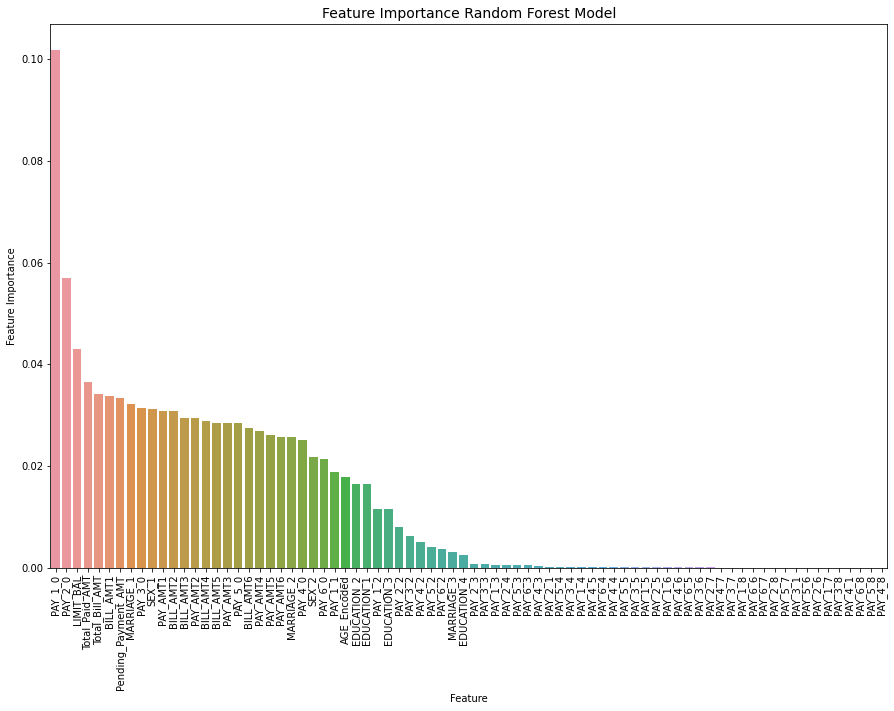

In [248]:
temp = pd.DataFrame({'Feature': list(x_smote.columns), 'Feature Importance': rf.feature_importances_})
temp = temp.sort_values(by="Feature Importance", ascending=False)

plt.figure(figsize=(15,10))
plt.title('Feature Importance Random Forest Model', fontsize=14)
s=sns.barplot(x='Feature', y='Feature Importance', data=temp)
s.set_xticklabels(s.get_xticklabels(), rotation=90)
plt.show();

#**ROC Curve**



###Receiver Operating Characteristic(ROC) summarizes the model’s performance by evaluating the trade offs between true positive rate (sensitivity) and false positive rate(1- specificity). For plotting ROC, it is advisable to assume p > 0.5 since we are more concerned about success rate.

###ROC summarizes the predictive power for all possible values of p > 0.5. The area under curve (AUC), referred to as index of accuracy(A) or concordance index, is a perfect performance metric for ROC curve. Higher the area under curve, better the prediction power of the model

In [244]:
print("ROC AUC score Random Forest= ", roc_auc_score(y_test, grid_search.predict(X_test)))
print("ROC AUC score XGBoost = ", roc_auc_score(y_test, grid_search_xgb.predict(X_test)))
print("ROC AUC score KNN = ", roc_auc_score(y_test, grid_knn.predict(X_test)))
print("ROC AUC score Logistic= ", roc_auc_score(y_test, grid_lr.predict(X_test)))
print("ROC AUC score SVM= ", roc_auc_score(y_test, grid_svm.predict(X_test)))

ROC AUC score Random Forest=  0.8773762008920659
ROC AUC score XGBoost =  0.8751424142179434
ROC AUC score KNN =  0.8252567496187356
ROC AUC score Logistic=  0.8762489467255229
ROC AUC score SVM=  0.8750420605805403


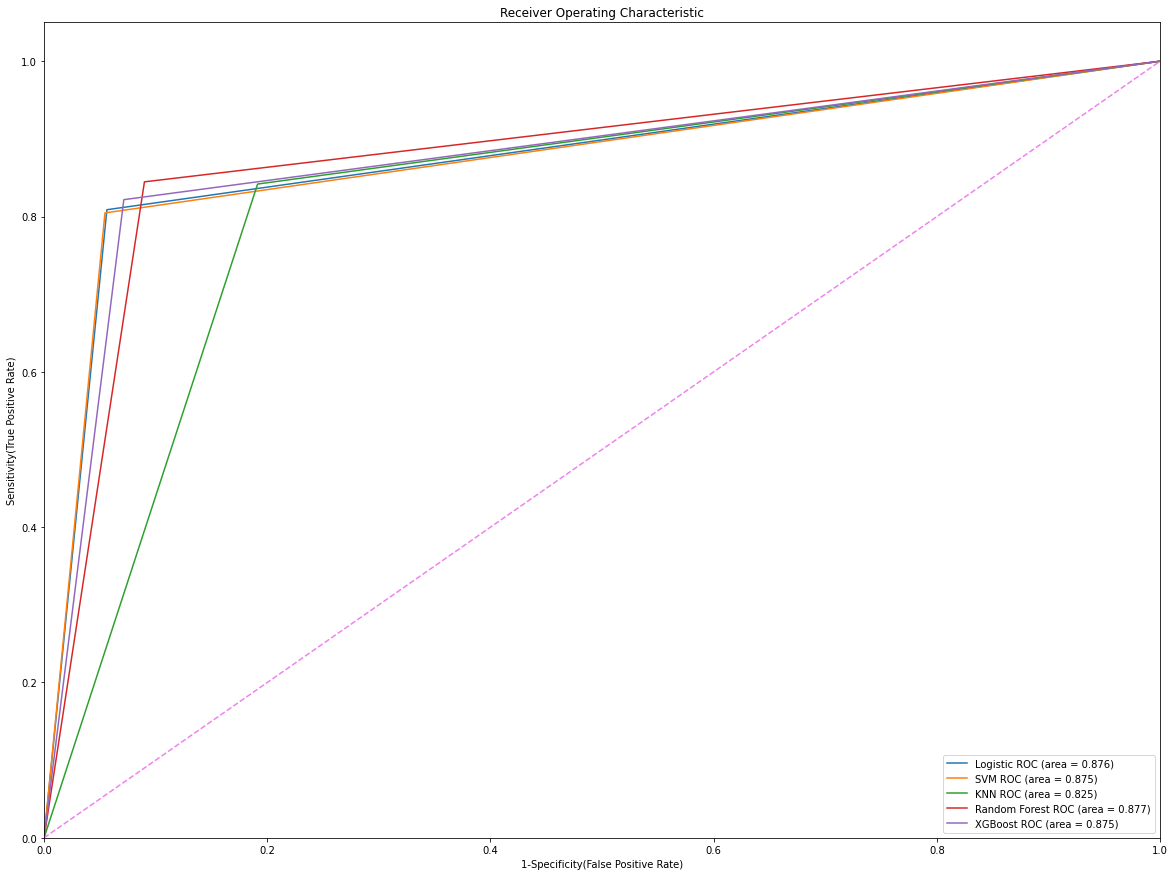

In [245]:
from sklearn import metrics

# false positive rate,fpr= FP/(TN+FP) OR fpr=1-specificty, tpr=sensitivity 
y_pred_log_p =grid_lr.predict(X_test)
y_pred_svc_p =grid_svm.predict(X_test)
y_pred_knn_p =grid_knn.predict(X_test)
y_pred_rf_p =grid_search.predict(X_test)
y_pred_xgb_p =grid_search_xgb.predict(X_test)

model = [grid_lr,grid_svm,grid_knn,grid_search,grid_search_xgb]

models=[y_pred_log_p,y_pred_svc_p,y_pred_knn_p,y_pred_rf_p,y_pred_xgb_p]
label=['Logistic','SVM','KNN','Random Forest','XGBoost']

# plotting ROC curves
plt.figure(figsize=(20, 15))
m= [0,1,2,3,4]
for m in m:
    fpr, tpr,thresholds= metrics.roc_curve(y_test,models[m])
    auc = metrics.roc_auc_score(y_test,model[m].predict(X_test))
    plt.plot(fpr, tpr, label='%s ROC (area = %0.3f)' % (label[m], auc))
plt.plot([0, 1], [0, 1],c='violet',ls='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()